# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. Set up Python](#2.-Set-up-Python)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data](#3.-Data)
    - [3.1 Presentation of the products used](#3.1-Presentation-of-the-products-used)
        - [3.1.1 Physical Oceanography - Global Ocean Physics Analysis and Forecast](#3.1.1-Physical-Oceanography---Global-Ocean-Physics-Analysis-and-Forecast)
        - [3.1.2 Wave Data - Global Ocean Waves Analysis and Forecast](#3.1.2-Wave-Data---Global-Ocean-Waves-Analysis-and-Forecast)
        - [3.1.3 Biogeochemical Data - Suspended Particulate Matter](#3.1.3-Biogeochemical-Data---Suspended-Particulate-Matter)
    - [3.2 Accessing the data: the Copernicus ToolBox](#3.2-Accessing-the-data:-the-Copernicus-ToolBox)
- [4. First look at the data](#4.-First-look-at-the-data)
    - [4.1 Loading and exploring the datasets](#4.1-Loading-and-exploring-the-datasets)
    - [4.2 Spatial overview of the study area](#4.2-Spatial-overview-of-the-study-area)
- [5. Ocean Currents Analysis](#5.-Ocean-Currents-Analysis)
    - [5.1 Surface current patterns](#5.1-Surface-current-patterns)
    - [5.2 Vertical current profiles](#5.2-Vertical-current-profiles)
    - [5.3 Seasonal variability](#5.3-Seasonal-variability)
- [6. Wave Climate Analysis](#6.-Wave-Climate-Analysis)
    - [6.1 Significant wave height statistics](#6.1-Significant-wave-height-statistics)
    - [6.2 Wave period and direction](#6.2-Wave-period-and-direction)
    - [6.3 Wave energy potential](#6.3-Wave-energy-potential)
- [7. Sediment Transport Processes](#7.-Sediment-Transport-Processes)
    - [7.1 Bed shear stress computation](#7.1-Bed-shear-stress-computation)
    - [7.2 Shields parameter analysis](#7.2-Shields-parameter-analysis)
    - [7.3 Sediment transport capacity estimation](#7.3-Sediment-transport-capacity-estimation)
    - [7.4 Wave-induced sediment resuspension](#7.4-Wave-induced-sediment-resuspension)
    - [7.5 Suspended particulate matter dynamics](#7.5-Suspended-particulate-matter-dynamics)
    - [7.6 Erosion and deposition tendency analysis](#7.6-Erosion-and-deposition-tendency-analysis)
- [8. Marine Energy Assessment](#8.-Marine-Energy-Assessment)
    - [8.1 Current energy potential](#8.1-Current-energy-potential)
    - [8.2 Wave energy potential](#8.2-Wave-energy-potential)
    - [8.3 Combined analysis and site suitability](#8.3-Combined-analysis-and-site-suitability)
- [9. Exercises](#9.-Exercises)
- [10. Conclusion](#10.-Conclusion)

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

The coastal waters of northeastern Brazil represent a dynamic and energetic marine environment with significant potential for marine renewable energy development. Located along the tropical Atlantic Ocean, this region experiences complex oceanographic conditions driven by the North Brazil Current (NBC), which is part of the Atlantic Meridional Overturning Circulation. These oceanographic features, combined with the region's wave climate influenced by trade winds, create both opportunities and challenges for marine energy projects.

Brazil's northeastern coastline encompasses diverse marine environments, from the warm, nutrient-poor waters of the tropical Atlantic to areas influenced by river discharge from the Parnaíba and other regional rivers. The North Brazil Current flows northwestward along the shelf edge, transporting warm equatorial waters with velocities that can reach 0.5-1.0 m/s. This current system, along with the persistent trade wind-driven waves, has been identified as having potential for ocean energy extraction. Additionally, the exposure to Atlantic trade wind-generated swells results in a consistent wave climate along the northeastern coast.

Understanding the hydrodynamic conditions and sediment transport processes in this region is crucial for several reasons:

1. **Marine Energy Development**: Accurate characterization of ocean currents and waves is essential for assessing energy resource potential, optimizing device placement, and predicting power generation.

2. **Environmental Impact Assessment**: Sediment transport processes affect coastal morphology, water quality, and marine ecosystems. Any marine energy installation must consider potential impacts on sediment dynamics and coastal stability.

3. **Engineering Design**: Knowledge of extreme current velocities, wave heights, and bed shear stresses is necessary for the structural design of energy conversion devices and their moorings.

4. **Operational Planning**: Seasonal and interannual variability in oceanographic conditions influences the operation and maintenance schedules of marine energy projects.

This notebook focuses on the analysis of hydrodynamic variables and sediment transport processes for the northeastern Brazilian coastal region, with particular emphasis on their implications for marine energy projects. We will utilize data from Copernicus Marine Service to examine:

- Ocean current velocities (horizontal and vertical structure)
- Wave characteristics (height, period, direction)
- Temperature and salinity distributions
- Derived parameters relevant to sediment transport (bed shear stress, Shields parameter, transport capacity)
- Suspended particulate matter concentrations

**Study Area**: Northeastern Brazilian coastal waters  
**Coordinates**: 6°S to 2°S, 38°W to 34°W  
**Time Period**: Year 2025

<div align="center">
<img src="./img/brazil_currents_map.png" width="800">

*Schematic representation of major current systems in northeastern Brazil. The North Brazil Current (NBC) dominates the regional circulation, flowing northwestward along the shelf break with influence from the South Equatorial Current system.*
</div>

# 2. Set up Python

[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays.|
| **pandas** | [Pandas](https://pandas.pydata.org/docs/) is a powerful package to manage data tables and time series.|
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **scipy** | [SciPy](https://scipy.org/) is an open-source Python library used for scientific and technical computing, providing tools for mathematics, statistics, optimization, and signal processing, making it essential for data analysis and complex computations. |
| **matplotlib** | [Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** | [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
| **datetime** | [Datetime](https://docs.python.org/3/library/datetime.html) supplies classes for manipulating dates and times |
| **cmocean** | [cmocean](https://matplotlib.org/cmocean/) provides beautiful colormaps specifically designed for oceanographic data visualization. |


In [42]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import glob
import datetime
import pandas as pd
import os

from scipy.stats import linregress, pearsonr
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Set plotting style
plt.style.use('bmh')

# Create output directories if they don't exist
os.makedirs('data', exist_ok=True)
os.makedirs('img', exist_ok=True)
os.makedirs('out', exist_ok=True)

print("All libraries loaded successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Xarray version: {xr.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All libraries loaded successfully!
NumPy version: 2.3.4
Xarray version: 2025.10.1
Matplotlib version: 3.10.7


# 3. Data

[Go back to the "Table of contents"](#Table-of-contents)

## 3.1 Presentation of the products used

[Go back to the "Table of contents"](#Table-of-contents)

For this analysis of hydrodynamics and sediment transport in northeastern Brazilian waters, we will utilize multiple products from the Copernicus Marine Service catalogue. These products provide comprehensive coverage of physical oceanography, wave conditions, and ocean color parameters necessary for assessing marine energy potential and sediment dynamics.

### 3.1.1 Physical Oceanography - Global Ocean Physics Analysis and Forecast

[Go back to the "Table of contents"](#Table-of-contents)

The primary source for ocean current velocities, temperature, salinity, and sea surface height is the **Global Ocean Physics Analysis and Forecast** product. This state-of-the-art operational system provides daily analyses and 10-day forecasts of the global ocean physical state.

The system is based on the NEMO (Nucleus for European Modelling of the Ocean) ocean model at 1/12° resolution (~8 km), coupled with the SI3 sea-ice model and the GELATO sea-ice model. It assimilates satellite observations of sea level anomaly, sea surface temperature, and sea ice concentration, as well as in-situ temperature and salinity profiles from Argo floats and other observing systems.

**Key characteristics:**

| Parameter | Value |
| :---: | :---|
| **Variables used** | uo (eastward velocity), vo (northward velocity), thetao (temperature), so (salinity), zos (sea surface height), bottomT (bottom temperature) |
| **Product identifier** | [GLOBAL_ANALYSISFORECAST_PHY_001_024](https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/description) |
| **Spatial resolution** | 1/12° × 1/12° (~8 km) |
| **Vertical levels** | 50 depth levels (0 to 5500m) |
| **Temporal resolution** | Daily |
| **Temporal coverage** | 2019-01-01 to present + 10-day forecast |

<center><img src="./img/global_ocean_analysis.png" width="300"></center>

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-024.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://catalogue.marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-024.pdf)

---

### 3.1.2 Wave Data - Global Ocean Waves Analysis and Forecast

[Go back to the "Table of contents"](#Table-of-contents)

Wave conditions are critical for both marine energy assessment and sediment transport analysis. We will use the **Global Ocean Waves Analysis and Forecast** product, which provides comprehensive wave parameters.

This product is based on the MFWAM (Météo-France WAve Model), a third-generation wave model that simulates wave generation, propagation, and dissipation. The model is forced by ECMWF winds and assimilates significant wave height observations from altimeter satellites.

**Key characteristics:**

| Parameter | Value |
| :---: | :---|
| **Variables used** | VHM0 (significant wave height), VMDR (mean wave direction), VTPK (peak wave period), VTM02 (mean wave period) |
| **Product identifier** | [GLOBAL_ANALYSISFORECAST_WAV_001_027](https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_WAV_001_027/description) |
| **Spatial resolution** | 1/5° × 1/5° (~20 km) |
| **Temporal resolution** | 3-hourly |
| **Temporal coverage** | 2019-01-01 to present + 10-day forecast |

<center><img src="./img/global_ocean_waves.png" width="300"></center>

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-027.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://catalogue.marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-027.pdf)

---

### 3.1.3 Ocean Color Data - Water Clarity and Turbidity Indicators

[Go back to the "Table of contents"](#Table-of-contents)

To complement our sediment transport analysis, we will use satellite-derived ocean color parameters from the **Global Ocean Colour** product. This product provides key optical properties that serve as indicators of water turbidity and suspended material in the ocean.

**Important Note on Turbidity**: The Copernicus Marine Service does not provide a direct "turbidity" variable. However, several ocean color parameters serve as excellent proxies for turbidity and water clarity:

- **KD490** (Diffuse Attenuation Coefficient at 490 nm): The most direct measure of turbidity, representing how quickly light is absorbed in water. Higher values indicate more turbid water.
- **ZSD** (Secchi Depth): An inverse measure of turbidity - the depth at which a white disk would disappear from view. Lower values indicate higher turbidity.
- **SPM** (Suspended Particulate Matter): Mass concentration of suspended particles, directly related to turbidity.
- **BBP** (Particulate Backscattering Coefficient): Measures light scattered by particles, another turbidity indicator.
- **CDM** (Colored Dissolved Matter Absorption): Absorption by dissolved organic matter.

This product uses multi-sensor satellite observations (MODIS-Aqua, NOAA-20-VIIRS, NPP-VIIRS, Sentinel3A-OLCI, Sentinel3B-OLCI) to derive bio-optical parameters.

**Key characteristics:**

| Parameter | Value |
| :---: | :---|
| **Variables used** | SPM (suspended particulate matter), KD490 (attenuation coefficient - turbidity), ZSD (Secchi depth - water clarity), CHL (chlorophyll) |
| **Product identifier** | [OCEANCOLOUR_GLO_BGC_L4_NRT_009_102](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L4_NRT_009_102/description) |
| **Spatial resolution** | 4 km × 4 km |
| **Temporal resolution** | Daily |
| **Temporal coverage** | 2023-04-01 to present (near real-time) |
| **Data type** | Satellite-derived Level 4 (gap-filled, surface only) |

<center><img src="./img/global_ocean_color.png" width="300"></center>

**Note**: As satellite data, this product only provides surface values and may have gaps due to cloud coverage. It complements physics-based sediment transport calculations with observed turbidity conditions.

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-OC-PUM-009-ALL.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://catalogue.marine.copernicus.eu/documents/QUID/CMEMS-OC-QUID-009-030-037-051-068-069-091-100-103-141-143.pdf)

## 3.2 Accessing the data: the Copernicus ToolBox

[Go back to the "Table of contents"](#Table-of-contents)

The [Copernicus Marine Toolbox](https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction) is a free tool that allows users to explore product metadata information, subset datasets, and download original files from producers, all without quotas. The procedure for downloading Copernicus Marine products is explained in detail [here](https://help.marine.copernicus.eu/en/collections/9054839-main-functionalities). The data needed for this analysis is entirely downloadable using the following Python cells.

In this section, we will demonstrate the downloading process by subsetting specific regions, variables, and time periods using the [subset](https://help.marine.copernicus.eu/en/articles/8283072-copernicus-marine-toolbox-api-subset) function of the Toolbox.

First, we import the Toolbox. Make sure to have activated a Python environment that contains the Copernicus Marine Toolbox library. You can install it using: `pip install copernicusmarine`

<center><img src="./img/py_kernel.png" width="300"></center>


In [2]:
import copernicusmarine

### Define the study area boundaries

We define the geographical boundaries of our northeastern Brazil study area. This region encompasses the North Brazil Current system and covers the continental shelf and slope off the states of Rio Grande do Norte, Ceará, and Piauí.


In [3]:
# Study area boundaries for northeastern Brazil
# Coordinates cover the coastal region influenced by the North Brazil Current
# Region includes continental shelf and upper slope areas

lat_min = -6    # Southern boundary
lat_max = -2    # Northern boundary
lon_min = -38   # Western boundary (coastal region)
lon_max = -34   # Eastern boundary (offshore)

print(f"Study Area: Northeastern Brazilian Coastal Waters")
print(f"Latitude range: {lat_min}°N to {lat_max}°N")
print(f"Longitude range: {lon_min}°E to {lon_max}°E")
print(f"Area coverage: ~{abs(lat_max - lat_min) * abs(lon_max - lon_min) * 111 * 111:.0f} km²")

Study Area: Northeastern Brazilian Coastal Waters
Latitude range: -6°N to -2°N
Longitude range: -38°E to -34°E
Area coverage: ~197136 km²


### Download Physical Oceanography Data

We will download ocean current velocities (uo, vo), temperature (thetao), salinity (so), sea surface height (zos), and mixed layer depth (mlotst) for the year 2025. We select multiple depth levels to capture the vertical structure of the currents, which is important for both marine energy assessment and sediment transport analysis.

**Note**: Due to the data structure in Copernicus Marine, we need to download currents and other physical variables separately as they are stored in different datasets within the GLOBAL_ANALYSISFORECAST_PHY_001_024 product.


**The following downloads may take several minutes** depending on your internet connection and the Copernicus Marine servers. You will be prompted to enter your Copernicus Marine credentials if not already configured.

In [4]:
# Download Physical Oceanography data - Part 1: Current velocities
# Dataset: cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m
# Variables: uo (eastward velocity), vo (northward velocity)

output_file = "data/Brazil_Currents_2025.nc"

if os.path.exists(output_file):
    print(f"✓ File '{output_file}' already exists. Skipping download.")
else:
    print("Downloading ocean currents (uo, vo) from GLOBAL_ANALYSISFORECAST_PHY_001_024...")
    print("This may take several minutes...")

    copernicusmarine.subset(
        dataset_id="cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m",
        variables=["uo", "vo"],
        minimum_longitude=lon_min,
        maximum_longitude=lon_max,
        minimum_latitude=lat_min,
        maximum_latitude=lat_max,
        start_datetime="2025-01-01T00:00:00",
        end_datetime="2025-12-31T23:59:59",
        minimum_depth=0.49,  # Surface layer
        maximum_depth=100,    # Down to 100m to capture vertical structure
        output_filename="Brazil_Currents_2025.nc",    
        output_directory="data"
    )
    print("✓ Ocean currents data downloaded successfully!")

✓ File 'data/Brazil_Currents_2025.nc' already exists. Skipping download.


In [5]:
# Download Physical Oceanography data - Part 2: Sea Surface Height
# Dataset: cmems_mod_glo_phy_anfc_0.083deg_P1D-m
# Variables: zos (sea surface height)

output_file = "data/Brazil_SSH_2025.nc"

if os.path.exists(output_file):
    print(f"✓ File '{output_file}' already exists. Skipping download.")
else:
    print("\nDownloading sea surface height from GLOBAL_ANALYSISFORECAST_PHY_001_024...")
    print("This may take several minutes...")

    copernicusmarine.subset(
            dataset_id="cmems_mod_glo_phy_anfc_0.083deg_P1D-m",
            variables=["zos"],
            minimum_longitude=lon_min,
            maximum_longitude=lon_max,
            minimum_latitude=lat_min,
            maximum_latitude=lat_max,
            start_datetime="2025-01-01T00:00:00",
            end_datetime="2025-12-31T23:59:59",
            output_filename="Brazil_SSH_2025.nc",

            output_directory="data"

        )    
    print("✓ Sea surface height downloaded successfully!")


✓ File 'data/Brazil_SSH_2025.nc' already exists. Skipping download.


**Troubleshooting Note**: If you encounter variable name errors, you can check which variables are available in a dataset using:

```python
copernicusmarine.describe(dataset_id="cmems_mod_glo_phy_anfc_0.083deg_P1D-m")
```

Common variable name variations:
- Temperature: `thetao`, `to`, `temperature`
- Salinity: `so`, `s`, `salinity`
- Sea Surface Height: `zos`, `ssh`, `adt`
- Mixed Layer Depth: `mlotst`, `mld`, `mlp`

### Download Wave Data

Wave parameters are essential for assessing wave energy potential and for calculating wave-induced bed shear stress and sediment resuspension. We download significant wave height, mean wave direction, peak period, and mean period.


In [6]:
# Download Wave data - 3-hourly fields for 2025
# Variables: Significant wave height, wave direction, wave periods

output_file = "data/Brazil_Waves_2025.nc"

if os.path.exists(output_file):
    print(f"✓ File '{output_file}' already exists. Skipping download.")
else:
    print("Downloading Wave data from GLOBAL_ANALYSISFORECAST_WAV_001_027...")
    print("This may take several minutes...")

    copernicusmarine.subset(
        dataset_id="cmems_mod_glo_wav_anfc_0.083deg_PT3H-i",
        variables=["VHM0", "VMDR", "VTPK", "VTM02"],
        minimum_longitude=lon_min,
        maximum_longitude=lon_max,
        minimum_latitude=lat_min,
        maximum_latitude=lat_max,
        start_datetime="2025-01-01T00:00:00",
        end_datetime="2025-12-31T23:59:59",
        output_filename="Brazil_Waves_2025.nc",    
        output_directory="data"
    )
    print("✓ Wave data downloaded successfully!")

✓ File 'data/Brazil_Waves_2025.nc' already exists. Skipping download.


### Download Ocean Color Data - Turbidity and Water Clarity Indicators

For sediment transport analysis, understanding water turbidity is essential. While Copernicus Marine Service does not provide a direct "turbidity" variable, ocean color satellite data offers several proxy variables that quantify turbidity and water clarity:

**Turbidity Proxy Variables:**

1. **KD490** (Diffuse Attenuation Coefficient at 490 nm) - **PRIMARY TURBIDITY INDICATOR**
   - Measures how rapidly light is attenuated (absorbed + scattered) in the water column
   - Units: m⁻¹ (per meter)
   - Higher KD490 = more turbid water (light penetrates less)
   - Typical range: 0.01 (very clear) to >1.0 (very turbid)
   - Most directly related to turbidity among available variables

2. **ZSD** (Secchi Depth) - **WATER CLARITY INDICATOR**
   - Estimated depth at which a standard white disk would disappear from view
   - Units: meters
   - Lower ZSD = higher turbidity (can't see as deep)
   - Inverse relationship with turbidity
   - Typical range: 1-50 meters depending on water clarity

3. **SPM** (Suspended Particulate Matter)
   - Mass concentration of suspended particles in water
   - Units: g/m³
   - Directly related to turbidity
   - Important for sediment transport processes

4. **CHL** (Chlorophyll-a concentration)
   - Phytoplankton pigment concentration
   - Can contribute to water turbidity in biologically productive regions

**Product**: OCEANCOLOUR_GLO_BGC_L4_NRT_009_102  
**Dataset**: cmems_obs-oc_glo_bgc-transp_nrt_l4-multi-4km_P1D  
**Resolution**: 4 km × 4 km  
**Coverage**: Daily from April 2023 to near real-time

**Limitations**: 
- Surface values only (satellite cannot see below surface)
- Cloud coverage creates data gaps
- Limited accuracy in very turbid coastal waters

**Application for Marine Energy Projects**:
- KD490 and ZSD help assess water clarity impacts of installations
- SPM indicates sediment resuspension and transport
- Temporal variability shows seasonal patterns
- Baseline for environmental impact assessment

In [7]:
# Download Ocean Color data - Turbidity proxy variables
# Product: OCEANCOLOUR_GLO_BGC_L4_NRT_009_102
# Dataset: cmems_obs-oc_glo_bgc-transp_nrt_l4-multi-4km_P1M (monthly, gap-filled L4)
# 
# Variables:
#   - SPM: Suspended particulate matter concentration
#   - KD490: Diffuse attenuation coefficient (PRIMARY TURBIDITY MEASURE)
#   - ZSD: Secchi depth (water clarity - inverse turbidity)
#   - CHL: Chlorophyll-a concentration
#
# Note: No direct "turbidity" variable exists in Copernicus Marine.
#       KD490 is the most direct turbidity indicator available.
#       This L4 product provides gap-filled data (cloud coverage interpolated).

output_file = "data/Brazil_OceanColor_2025.nc"

if os.path.exists(output_file):
    print(f"✓ File '{output_file}' already exists. Skipping download.")
else:
    print("Downloading Ocean Color data (turbidity proxies) from OCEANCOLOUR_GLO_BGC_L4_NRT_009_102...")
    print("Variables: SPM (suspended matter), KD490 (turbidity), ZSD (water clarity)")
    print("Temporal resolution: MONTHLY (P1M)")
    print("This may take several minutes...")

    copernicusmarine.subset(
            dataset_id="cmems_obs-oc_glo_bgc-transp_nrt_l4-multi-4km_P1M",
            variables=["SPM", "KD490", "ZSD"],  # SPM, turbidity proxies 
            minimum_longitude=lon_min,
            maximum_longitude=lon_max,
            minimum_latitude=lat_min,
            maximum_latitude=lat_max,
            start_datetime="2025-01-01T00:00:00",
            end_datetime="2025-12-31T23:59:59",
            output_filename="Brazil_OceanColor_2025.nc",
            output_directory="data"

        )    
    print("✓ Ocean Color data downloaded successfully!")    
    

✓ File 'data/Brazil_OceanColor_2025.nc' already exists. Skipping download.


---

**All datasets have been downloaded successfully!**

The data are now stored in the `data/` directory as NetCDF files:
- `Brazil_Currents_2025.nc` - Ocean current velocities (uo, vo) at multiple depths
- `Brazil_SSH_2025.nc` - Sea surface height
- `Brazil_Waves_2025.nc` - Wave parameters (height, direction, period)
- `Brazil_OceanColor_2025.nc` - SPM and turbidity proxies (KD490, ZSD) - monthly data

**Note on Ocean Color Data**: 
The ocean color dataset uses **monthly temporal resolution** (P1M), providing monthly snapshots throughout the year. Depending on NRT data availability, some months may not yet be processed. This is normal for near-real-time satellite products.

**Turbidity Data Note**: 
The ocean color dataset (OCEANCOLOUR_GLO_BGC_L4_NRT_009_102) provides **SPM** (suspended particulate matter) directly, along with **KD490** (diffuse attenuation coefficient) as the primary turbidity measure, and **ZSD** (Secchi depth) for water clarity. While no direct "turbidity" variable exists in Copernicus Marine, KD490 is the standard oceanographic parameter for quantifying turbidity. This Level 4 gap-filled product minimizes cloud coverage issues.

In the following sections, we will:
1. Load and explore all datasets
2. Analyze current patterns and wave climate
3. Compute sediment transport parameters using physics-based calculations
4. Examine turbidity patterns using KD490 and other ocean color variables
5. Assess marine energy potential from currents and waves

The combination of satellite-observed turbidity (KD490, SPM) and physics-based sediment transport calculations will provide a comprehensive understanding of sediment dynamics relevant to marine energy projects.

# 4. First look at the data

[Go back to the "Table of contents"](#Table-of-contents)

Now that we have downloaded all the necessary data, let's load the datasets and explore their structure and content.

## 4.1 Loading and exploring the datasets

[Go back to the "Table of contents"](#Table-of-contents)

We will use the **xarray** library to load and manipulate the NetCDF files. Xarray provides a powerful and intuitive interface for working with labeled multi-dimensional arrays, making it ideal for oceanographic data analysis.

In [8]:
# Load the physical oceanography datasets
print("Loading Physical Oceanography data...")
ds_currents = xr.open_dataset('data/Brazil_Currents_2025.nc')

print("\n" + "="*70)
print("OCEAN CURRENTS DATASET")
print("="*70)
print(ds_currents)

# Try to load temperature-salinity dataset if it exists
import os
if os.path.exists('data/Brazil_TempSal_2025.nc'):
    ds_tempsal = xr.open_dataset('data/Brazil_TempSal_2025.nc')
    print("\n" + "="*70)
    print("TEMPERATURE-SALINITY DATASET")
    print("="*70)
    print(ds_tempsal)
elif os.path.exists('data/Brazil_SSH_2025.nc'):
    ds_tempsal = xr.open_dataset('data/Brazil_SSH_2025.nc')
    print("\n" + "="*70)
    print("SEA SURFACE HEIGHT DATASET")
    print("="*70)
    print(ds_tempsal)
else:
    print("\nNote: Temperature-Salinity dataset not found. Proceeding with currents only.")
    ds_tempsal = None

Loading Physical Oceanography data...

OCEAN CURRENTS DATASET
<xarray.Dataset> Size: 154MB
Dimensions:    (time: 365, depth: 22, latitude: 49, longitude: 49)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2025-01-01 2025-01-02 ... 2025-12-31
  * depth      (depth) float32 88B 0.494 1.541 2.646 3.819 ... 65.81 77.85 92.33
  * latitude   (latitude) float32 196B -6.0 -5.917 -5.833 ... -2.167 -2.083 -2.0
  * longitude  (longitude) float32 196B -38.0 -37.92 -37.83 ... -34.08 -34.0
Data variables:
    uo         (time, depth, latitude, longitude) float32 77MB ...
    vo         (time, depth, latitude, longitude) float32 77MB ...
Attributes:
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    credit:                    E.U. Copernicus Marine Service Information (CM...
    references:                http://marine.copernicus.eu
    Conventions:               CF-1.8
    source:                    MOI GLO12
    title:                     daily mean fields fr

In [9]:
# Merge the physical datasets for easier analysis
# Note: They should have compatible coordinates (lat, lon, time, depth)

if ds_tempsal is not None:
    print("\nMerging physical oceanography datasets...")
    ds_phy = xr.merge([ds_currents, ds_tempsal])
    print("✓ Datasets merged successfully!")
    print(f"\nMerged dataset contains: {', '.join([str(v) for v in ds_phy.data_vars])}")
else:
    print("\nUsing currents dataset only...")
    ds_phy = ds_currents
    print(f"Dataset contains: {', '.join([str(v) for v in ds_phy.data_vars])}")


Merging physical oceanography datasets...
✓ Datasets merged successfully!

Merged dataset contains: uo, vo, zos


In [10]:
# Load the wave dataset
print("Loading Wave data...")
ds_wav = xr.open_dataset('data/Brazil_Waves_2025.nc')

print("\n" + "="*70)
print("WAVE DATASET")
print("="*70)
ds_wav

Loading Wave data...

WAVE DATASET


<xarray.Dataset> Size: 224MB
Dimensions:    (time: 2920, latitude: 49, longitude: 49)
Coordinates:
  * time       (time) datetime64[ns] 23kB 2025-01-01 ... 2025-12-31T21:00:00
  * latitude   (latitude) float64 392B -6.0 -5.917 -5.833 ... -2.167 -2.083 -2.0
  * longitude  (longitude) float64 392B -38.0 -37.92 -37.83 ... -34.08 -34.0
Data variables:
    VHM0       (time, latitude, longitude) float64 56MB ...
    VMDR       (time, latitude, longitude) float64 56MB ...
    VTPK       (time, latitude, longitude) float64 56MB ...
    VTM02      (time, latitude, longitude) float64 56MB ...
Attributes:
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    credit:                    E.U. Copernicus Marine Service Information (CM...
    references:                http://marine.copernicus.eu
    Conventions:               CF-1.6
    contact:                   servicedesk.cmems@mercator-ocean.eu
    institution:               METEO-FRANCE
    copernicusmarine_version:  2.2.3

In [11]:
# Load Ocean Color dataset (SPM and turbidity indicators) if available
import os

if os.path.exists('data/Brazil_OceanColor_2024.nc'):
    print("Loading Ocean Color data (SPM, KD490, ZSD)...")
    ds_spm = xr.open_dataset('data/Brazil_OceanColor_2024.nc')
    
    print("\n" + "="*70)
    print("OCEAN COLOR DATASET - SPM & TURBIDITY INDICATORS (L4 NRT)")
    print("="*70)
    print(ds_spm)
    print("\nAvailable variables:")
    if 'SPM' in ds_spm.data_vars:
        print("  ✓ SPM: Suspended particulate matter concentration")
    if 'KD490' in ds_spm.data_vars:
        print("  ✓ KD490: Diffuse attenuation coefficient (primary turbidity measure)")
    if 'ZSD' in ds_spm.data_vars:
        print("  ✓ ZSD: Secchi depth (water clarity indicator)")
    if 'CHL' in ds_spm.data_vars:
        print("  ✓ CHL: Chlorophyll-a concentration")
elif os.path.exists('data/Brazil_OceanColor_2025.nc'):
    print("Loading Ocean Color data (SPM, KD490, ZSD, CHL)...")
    ds_spm = xr.open_dataset('data/Brazil_OceanColor_2025.nc')
    
    print("\n" + "="*70)
    print("OCEAN COLOR DATASET - SPM & TURBIDITY INDICATORS")
    print("="*70)
    print(ds_spm)
    print("\nAvailable variables:")
    if 'SPM' in ds_spm.data_vars:
        print("  ✓ SPM: Suspended particulate matter concentration")
    if 'KD490' in ds_spm.data_vars:
        print("  ✓ KD490: Diffuse attenuation coefficient (primary turbidity measure)")
    if 'ZSD' in ds_spm.data_vars:
        print("  ✓ ZSD: Secchi depth (water clarity indicator)")
    if 'CHL' in ds_spm.data_vars:
        print("  ✓ CHL: Chlorophyll-a concentration")
else:
    print("\n" + "="*70)
    print("Note: Ocean Color data not available.")
    print("="*70)
    print("Turbidity cannot be directly measured from available data.")
    print("However, sediment transport analysis will use physics-based parameters:")
    print("  - Bed shear stress from currents and waves")
    print("  - Shields parameter for sediment mobility")
    print("  - Sediment transport capacity estimates")
    print("\nTo obtain turbidity data, download ocean color product with KD490 variable.")
    print("="*70)
    ds_spm = None

Loading Ocean Color data (SPM, KD490, ZSD, CHL)...

OCEAN COLOR DATASET - SPM & TURBIDITY INDICATORS
<xarray.Dataset> Size: 333kB
Dimensions:    (time: 3, latitude: 96, longitude: 96)
Coordinates:
  * time       (time) datetime64[ns] 24B 2025-10-01 2025-11-01 2025-12-01
  * latitude   (latitude) float32 384B -5.979 -5.938 -5.896 ... -2.063 -2.021
  * longitude  (longitude) float32 384B -37.98 -37.94 -37.9 ... -34.06 -34.02
Data variables:
    SPM        (time, latitude, longitude) float32 111kB ...
    KD490      (time, latitude, longitude) float32 111kB ...
    ZSD        (time, latitude, longitude) float32 111kB ...
Attributes:
    references:                http://www.globcolour.info GlobColour has been...
    comment:                   average
    Conventions:               CF-1.8, ACDD-1.3
    history:                   Created using software developed at ACRI-ST
    source:                    surface observation
    title:                     cmems_obs-oc_glo_bgc-transp_nrt_l4-mu

### Dataset dimensions and variables summary

Let's create a summary of the key information from each dataset:

In [12]:
# Create a summary of the datasets

print("="*70)
print("DATASET SUMMARY")
print("="*70)

print("\n1. PHYSICAL OCEANOGRAPHY (Merged)")
print(f"   Time range: {ds_phy.time.values[0]} to {ds_phy.time.values[-1]}")
print(f"   Number of time steps: {len(ds_phy.time)}")
print(f"   Depth levels: {len(ds_phy.depth)} levels")
print(f"   Depth range: {ds_phy.depth.values[0]:.2f} m to {ds_phy.depth.values[-1]:.2f} m")
print(f"   Grid size: {len(ds_phy.latitude)} × {len(ds_phy.longitude)} points")
print(f"   Variables: {', '.join([str(v) for v in ds_phy.data_vars])}")

print("\n2. WAVE DATA")
print(f"   Time range: {ds_wav.time.values[0]} to {ds_wav.time.values[-1]}")
print(f"   Number of time steps: {len(ds_wav.time)}")
print(f"   Grid size: {len(ds_wav.latitude)} × {len(ds_wav.longitude)} points")
print(f"   Variables: {', '.join([str(v) for v in ds_wav.data_vars])}")

if ds_spm is not None:
    print("\n3. OCEAN COLOR - TURBIDITY & WATER CLARITY")
    print(f"   Time range: {ds_spm.time.values[0]} to {ds_spm.time.values[-1]}")
    print(f"   Number of time steps: {len(ds_spm.time)}")
    print(f"   Grid size: {len(ds_spm.latitude)} × {len(ds_spm.longitude)} points")
    print(f"   Variables: {', '.join([str(v) for v in ds_spm.data_vars])}")
    print("\n   Turbidity Indicators:")
    if 'KD490' in ds_spm.data_vars:
        print(f"   - KD490 (attenuation): {ds_spm.KD490.attrs.get('long_name', 'Diffuse attenuation coefficient')}")
    if 'ZSD' in ds_spm.data_vars:
        print(f"   - ZSD (clarity): {ds_spm.ZSD.attrs.get('long_name', 'Secchi disk depth')}")
    if 'SPM' in ds_spm.data_vars:
        print(f"   - SPM: {ds_spm.SPM.attrs.get('long_name', 'Suspended particulate matter')}")

print("\n" + "="*70)
print("Ready for hydrodynamic and sediment transport analysis!")
print("\nNote: 'Turbidity' is not a direct variable in Copernicus Marine.")
print("      Use KD490 as the primary turbidity indicator.")
print("="*70)

DATASET SUMMARY

1. PHYSICAL OCEANOGRAPHY (Merged)
   Time range: 2025-01-01T00:00:00.000000000 to 2025-12-31T00:00:00.000000000
   Number of time steps: 365
   Depth levels: 22 levels
   Depth range: 0.49 m to 92.33 m
   Grid size: 49 × 49 points
   Variables: uo, vo, zos

2. WAVE DATA
   Time range: 2025-01-01T00:00:00.000000000 to 2025-12-31T21:00:00.000000000
   Number of time steps: 2920
   Grid size: 49 × 49 points
   Variables: VHM0, VMDR, VTPK, VTM02

3. OCEAN COLOR - TURBIDITY & WATER CLARITY
   Time range: 2025-10-01T00:00:00.000000000 to 2025-12-01T00:00:00.000000000
   Number of time steps: 3
   Grid size: 96 × 96 points
   Variables: SPM, KD490, ZSD

   Turbidity Indicators:
   - KD490 (attenuation): Diffuse attenuation coefficient - Mean of the binned pixels
   - ZSD (clarity): Secchi disk depth - Mean of the binned pixels
   - SPM: Inorganic suspended particulate matter in sea water - Mean of the binned pixels

Ready for hydrodynamic and sediment transport analysis!

Not

### Compute derived variables

To facilitate our analysis, we'll compute some derived variables:
- **Current speed**: Total horizontal current velocity magnitude
- **Current direction**: Direction of the current flow

Current Speed = $\sqrt{uo^2 + vo^2}$

Current Direction = $\arctan2(vo, uo) \times \frac{180}{\pi}$

In [13]:
# Compute current speed (magnitude of horizontal velocity)
ds_phy['current_speed'] = np.sqrt(ds_phy.uo**2 + ds_phy.vo**2)
ds_phy['current_speed'].attrs['long_name'] = 'Current Speed'
ds_phy['current_speed'].attrs['units'] = 'm/s'

# Compute current direction (in degrees, oceanographic convention: direction TO)
ds_phy['current_direction'] = (np.arctan2(ds_phy.vo, ds_phy.uo) * 180 / np.pi) % 360
ds_phy['current_direction'].attrs['long_name'] = 'Current Direction'
ds_phy['current_direction'].attrs['units'] = 'degrees'

print("✓ Computed derived variables:")
print("  - current_speed (m/s)")
print("  - current_direction (degrees)")

✓ Computed derived variables:
  - current_speed (m/s)
  - current_direction (degrees)


## 4.2 Spatial overview of the study area

[Go back to the "Table of contents"](#Table-of-contents)

Let's create a comprehensive map showing the bathymetry and key features of the study area. We'll also plot a snapshot of surface currents and significant wave height to get a first impression of the oceanographic conditions.

In [14]:
# Select a representative date for visualization (mid-summer in Southern Hemisphere)
date_plot = '2025-01-15'

# Extract surface data for the selected date
phy_surface = ds_phy.sel(time=date_plot, depth=0.49, method='nearest')
wav_surface = ds_wav.sel(time=date_plot, method='nearest')

print(f"Plotting data for: {date_plot}")
print(f"Physical data time: {phy_surface.time.values}")
print(f"Wave data time: {wav_surface.time.values}")

Plotting data for: 2025-01-15
Physical data time: 2025-01-15T00:00:00.000000000
Wave data time: 2025-01-15T00:00:00.000000000


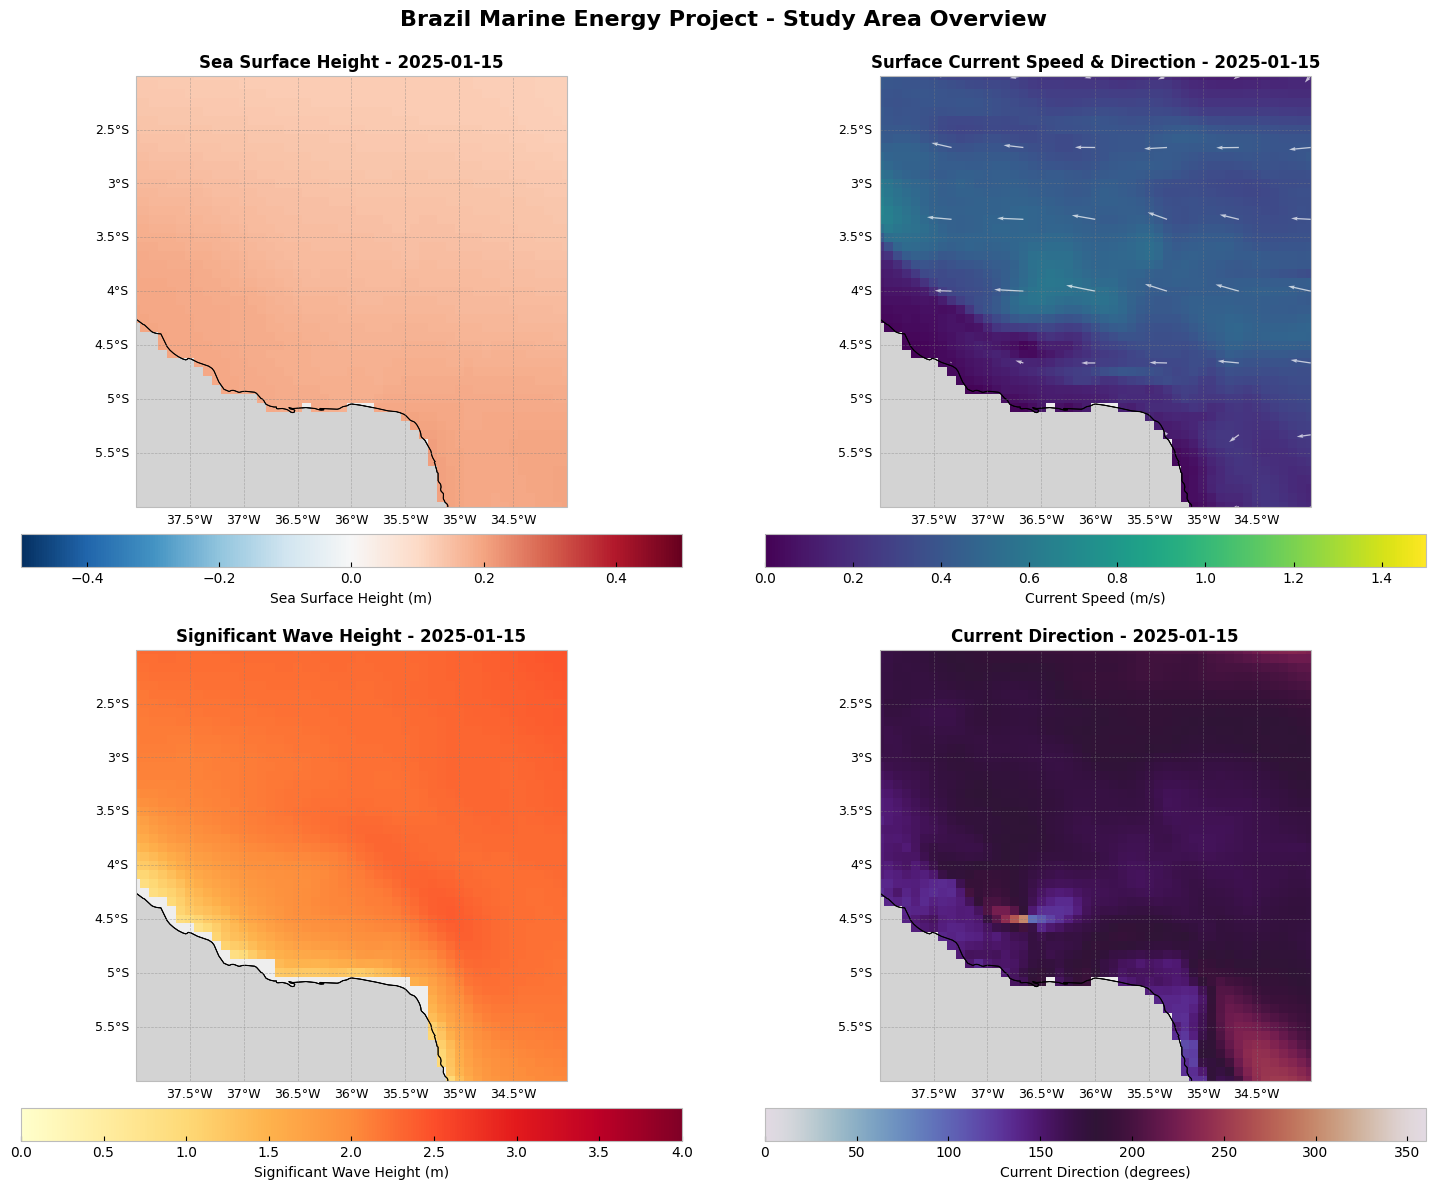

✓ Map saved to: img/study_area_overview.png


In [15]:
# Create a figure with subplots showing the study area

fig = plt.figure(figsize=(16, 12))

# Subplot 1: Sea Surface Temperature (or SSH if temp not available)
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.coastlines(resolution='10m', linewidth=0.8)

# Plot SST if available, otherwise plot SSH
if 'thetao' in phy_surface.data_vars:
    var_to_plot = phy_surface.thetao
    cmap_to_use = 'RdYlBu_r'
    vmin_val, vmax_val = 22, 28
    label_text = 'Sea Surface Temperature (°C)'
    title_text = f'Sea Surface Temperature - {date_plot}'
elif 'to' in phy_surface.data_vars:
    var_to_plot = phy_surface.to
    cmap_to_use = 'RdYlBu_r'
    vmin_val, vmax_val = 22, 28
    label_text = 'Sea Surface Temperature (°C)'
    title_text = f'Sea Surface Temperature - {date_plot}'
elif 'zos' in phy_surface.data_vars:
    var_to_plot = phy_surface.zos
    cmap_to_use = 'RdBu_r'
    vmin_val, vmax_val = -0.5, 0.5
    label_text = 'Sea Surface Height (m)'
    title_text = f'Sea Surface Height - {date_plot}'
else:
    # Create empty plot if no suitable variable
    var_to_plot = None
    title_text = 'Data not available'
    label_text = ''
    cmap_to_use = 'gray'
    vmin_val, vmax_val = 0, 1

if var_to_plot is not None:
    sst_plot = ax1.pcolormesh(phy_surface.longitude, phy_surface.latitude, 
                               var_to_plot, 
                               transform=ccrs.PlateCarree(),
                               cmap=cmap_to_use, vmin=vmin_val, vmax=vmax_val,
                               shading='auto')
    cbar1 = plt.colorbar(sst_plot, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.8)
    cbar1.set_label(label_text, fontsize=10)

# Add gridlines
gl1 = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 9}
gl1.ylabel_style = {'size': 9}

ax1.set_title(title_text, fontsize=12, fontweight='bold')

# Subplot 2: Surface Current Speed
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.coastlines(resolution='10m', linewidth=0.8)

# Plot current speed
cs_plot = ax2.pcolormesh(phy_surface.longitude, phy_surface.latitude, 
                          phy_surface.current_speed, 
                          transform=ccrs.PlateCarree(),
                          cmap='viridis', vmin=0, vmax=1.5,
                          shading='auto')
cbar2 = plt.colorbar(cs_plot, ax=ax2, orientation='horizontal', pad=0.05, shrink=0.8)
cbar2.set_label('Current Speed (m/s)', fontsize=10)

# Add current vectors (subsample for clarity)
skip = 8
ax2.quiver(phy_surface.longitude.values[::skip], phy_surface.latitude.values[::skip],
           phy_surface.uo.values[::skip, ::skip], phy_surface.vo.values[::skip, ::skip],
           transform=ccrs.PlateCarree(), scale=8, width=0.003, alpha=0.7, color='white')

gl2 = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False
gl2.xlabel_style = {'size': 9}
gl2.ylabel_style = {'size': 9}

ax2.set_title(f'Surface Current Speed & Direction - {date_plot}', fontsize=12, fontweight='bold')

# Subplot 3: Significant Wave Height
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax3.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax3.coastlines(resolution='10m', linewidth=0.8)

# Plot Significant Wave Height
wave_plot = ax3.pcolormesh(wav_surface.longitude, wav_surface.latitude, 
                            wav_surface.VHM0, 
                            transform=ccrs.PlateCarree(),
                            cmap='YlOrRd', vmin=0, vmax=4,
                            shading='auto')
cbar3 = plt.colorbar(wave_plot, ax=ax3, orientation='horizontal', pad=0.05, shrink=0.8)
cbar3.set_label('Significant Wave Height (m)', fontsize=10)

gl3 = ax3.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl3.top_labels = False
gl3.right_labels = False
gl3.xlabel_style = {'size': 9}
gl3.ylabel_style = {'size': 9}

ax3.set_title(f'Significant Wave Height - {date_plot}', fontsize=12, fontweight='bold')

# Subplot 4: Sea Surface Salinity (or current direction if salinity not available)
ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax4.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax4.coastlines(resolution='10m', linewidth=0.8)

# Plot salinity if available, otherwise plot current direction
if 'so' in phy_surface.data_vars:
    var4_to_plot = phy_surface.so
    cmap4 = 'haline'
    vmin4, vmax4 = 35.0, 37.0
    label4 = 'Sea Surface Salinity (PSU)'
    title4 = f'Sea Surface Salinity - {date_plot}'
elif 's' in phy_surface.data_vars:
    var4_to_plot = phy_surface.s
    cmap4 = 'haline'
    vmin4, vmax4 = 35.0, 37.0
    label4 = 'Sea Surface Salinity (PSU)'
    title4 = f'Sea Surface Salinity - {date_plot}'
else:
    var4_to_plot = phy_surface.current_direction
    cmap4 = 'twilight'
    vmin4, vmax4 = 0, 360
    label4 = 'Current Direction (degrees)'
    title4 = f'Current Direction - {date_plot}'

sal_plot = ax4.pcolormesh(phy_surface.longitude, phy_surface.latitude, 
                           var4_to_plot, 
                           transform=ccrs.PlateCarree(),
                           cmap=cmap4, vmin=vmin4, vmax=vmax4,
                           shading='auto')
cbar4 = plt.colorbar(sal_plot, ax=ax4, orientation='horizontal', pad=0.05, shrink=0.8)
cbar4.set_label(label4, fontsize=10)

gl4 = ax4.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl4.top_labels = False
gl4.right_labels = False
gl4.xlabel_style = {'size': 9}
gl4.ylabel_style = {'size': 9}

ax4.set_title(title4, fontsize=12, fontweight='bold')

# Overall title
plt.suptitle('Brazil Marine Energy Project - Study Area Overview', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('img/study_area_overview.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Map saved to: img/study_area_overview.png")

The overview maps reveal several important features:

1. **Sea Surface Temperature**: The Brazil Current brings warm tropical waters southward along the coast, with temperatures typically ranging from 22-28°C in the study area.

2. **Surface Currents**: The southward-flowing Brazil Current is visible along the continental shelf and slope. Current speeds vary spatially, with higher velocities in the core of the current.

3. **Wave Climate**: The Atlantic Ocean generates moderate to high energy waves that impact the Brazilian coastline, with significant wave heights typically ranging from 1-3 meters, increasing during storm events.

4. **Salinity Patterns**: Salinity distribution reflects the influence of river discharge (particularly from major rivers) and mixing with offshore waters, with variations between coastal and offshore regions.

In the following sections, we will analyze these parameters in detail and compute derived quantities relevant to sediment transport and marine energy assessment.

### Ocean Color Data - Turbidity and Water Clarity

If ocean color data is available, let's visualize the turbidity indicators (SPM, KD490, ZSD) to understand the distribution of suspended particles and water clarity in the study area. These parameters are crucial for assessing potential environmental impacts of marine energy installations on water quality and sediment dynamics.

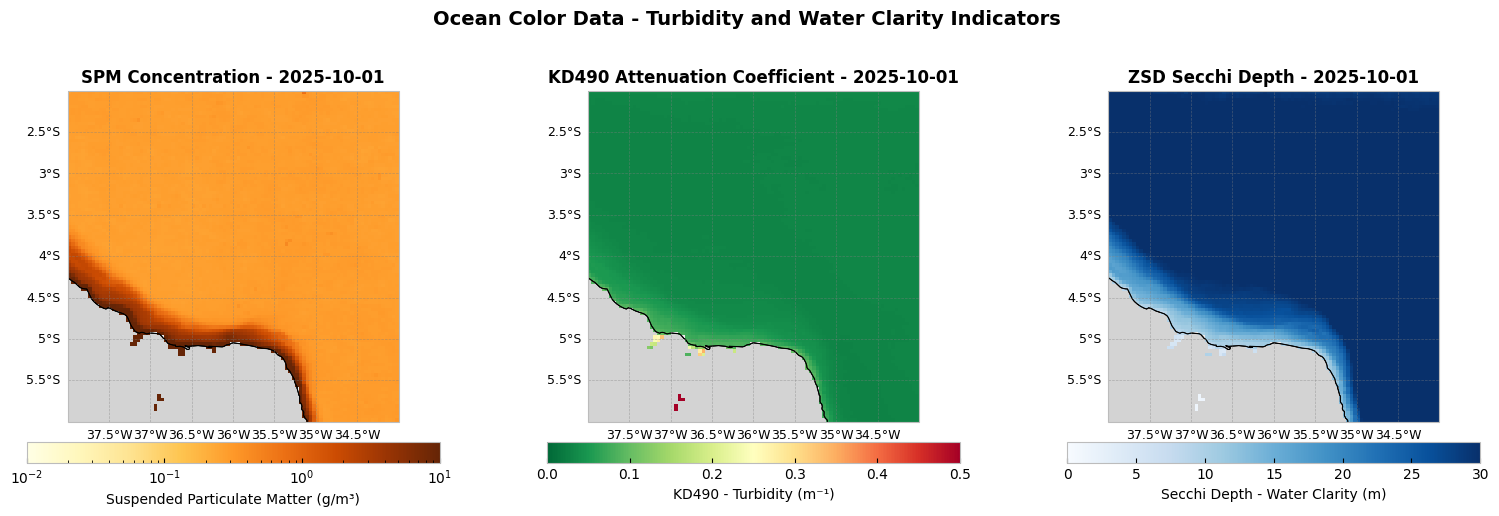

✓ Ocean color map saved to: img/ocean_color_overview.png

INTERPRETATION GUIDE:
• SPM (Suspended Particulate Matter):
  - Higher values indicate more suspended particles in water
  - Typical coastal values: 0.1-5 g/m³, turbid areas: >5 g/m³
• KD490 (Diffuse Attenuation - PRIMARY TURBIDITY MEASURE):
  - Higher values = more turbid water (less light penetration)
  - Clear ocean: <0.05 m⁻¹, Coastal: 0.1-0.3 m⁻¹, Turbid: >0.5 m⁻¹
• ZSD (Secchi Depth - WATER CLARITY):
  - Higher values = clearer water (can see deeper)
  - Clear ocean: >20m, Coastal: 5-15m, Turbid: <5m
  - Inverse relationship with turbidity


In [16]:
# Plot ocean color data if available
if ds_spm is not None:
    # Select a date for ocean color visualization
    # Ocean color data may have different temporal coverage than physics data
    try:
        # Try to select same date as physical data
        spm_surface = ds_spm.sel(time=date_plot, method='nearest')
        date_plot_spm = str(spm_surface.time.values)[:10]
    except:
        # If date not available, use first available date
        spm_surface = ds_spm.isel(time=0)
        date_plot_spm = str(spm_surface.time.values)[:10]
        print(f"Note: Using ocean color data from {date_plot_spm} (closest available)")
    
    # Create figure with 3 subplots for ocean color variables
    fig = plt.figure(figsize=(16, 5))
    
    # Subplot 1: Suspended Particulate Matter (SPM)
    if 'SPM' in ds_spm.data_vars:
        ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
        ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        ax1.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
        ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax1.coastlines(resolution='10m', linewidth=0.8)
        
        # Plot SPM with logarithmic scale (typical for SPM)
        spm_plot = ax1.pcolormesh(spm_surface.longitude, spm_surface.latitude, 
                                   spm_surface.SPM, 
                                   transform=ccrs.PlateCarree(),
                                   cmap='YlOrBr', norm=colors.LogNorm(vmin=0.01, vmax=10),
                                   shading='auto')
        cbar1 = plt.colorbar(spm_plot, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.8)
        cbar1.set_label('Suspended Particulate Matter (g/m³)', fontsize=10)
        
        gl1 = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
        gl1.top_labels = False
        gl1.right_labels = False
        gl1.xlabel_style = {'size': 9}
        gl1.ylabel_style = {'size': 9}
        
        ax1.set_title(f'SPM Concentration - {date_plot_spm}', fontsize=12, fontweight='bold')
    
    # Subplot 2: Diffuse Attenuation Coefficient (KD490) - Primary turbidity indicator
    if 'KD490' in ds_spm.data_vars:
        ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
        ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
        ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax2.coastlines(resolution='10m', linewidth=0.8)
        
        # Plot KD490 (turbidity indicator)
        kd_plot = ax2.pcolormesh(spm_surface.longitude, spm_surface.latitude, 
                                  spm_surface.KD490, 
                                  transform=ccrs.PlateCarree(),
                                  cmap='RdYlGn_r', vmin=0, vmax=0.5,
                                  shading='auto')
        cbar2 = plt.colorbar(kd_plot, ax=ax2, orientation='horizontal', pad=0.05, shrink=0.8)
        cbar2.set_label('KD490 - Turbidity (m⁻¹)', fontsize=10)
        
        gl2 = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
        gl2.top_labels = False
        gl2.right_labels = False
        gl2.xlabel_style = {'size': 9}
        gl2.ylabel_style = {'size': 9}
        
        ax2.set_title(f'KD490 Attenuation Coefficient - {date_plot_spm}', fontsize=12, fontweight='bold')
    
    # Subplot 3: Secchi Depth (ZSD) - Water clarity indicator
    if 'ZSD' in ds_spm.data_vars:
        ax3 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
        ax3.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        ax3.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
        ax3.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax3.coastlines(resolution='10m', linewidth=0.8)
        
        # Plot ZSD (water clarity - higher values = clearer water)
        zsd_plot = ax3.pcolormesh(spm_surface.longitude, spm_surface.latitude, 
                                   spm_surface.ZSD, 
                                   transform=ccrs.PlateCarree(),
                                   cmap='Blues', vmin=0, vmax=30,
                                   shading='auto')
        cbar3 = plt.colorbar(zsd_plot, ax=ax3, orientation='horizontal', pad=0.05, shrink=0.8)
        cbar3.set_label('Secchi Depth - Water Clarity (m)', fontsize=10)
        
        gl3 = ax3.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
        gl3.top_labels = False
        gl3.right_labels = False
        gl3.xlabel_style = {'size': 9}
        gl3.ylabel_style = {'size': 9}
        
        ax3.set_title(f'ZSD Secchi Depth - {date_plot_spm}', fontsize=12, fontweight='bold')
    
    plt.suptitle('Ocean Color Data - Turbidity and Water Clarity Indicators', 
                 fontsize=14, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    plt.savefig('img/ocean_color_overview.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Ocean color map saved to: img/ocean_color_overview.png")
    
    # Print interpretation guidance
    print("\n" + "="*70)
    print("INTERPRETATION GUIDE:")
    print("="*70)
    if 'SPM' in ds_spm.data_vars:
        print("• SPM (Suspended Particulate Matter):")
        print("  - Higher values indicate more suspended particles in water")
        print("  - Typical coastal values: 0.1-5 g/m³, turbid areas: >5 g/m³")
    if 'KD490' in ds_spm.data_vars:
        print("• KD490 (Diffuse Attenuation - PRIMARY TURBIDITY MEASURE):")
        print("  - Higher values = more turbid water (less light penetration)")
        print("  - Clear ocean: <0.05 m⁻¹, Coastal: 0.1-0.3 m⁻¹, Turbid: >0.5 m⁻¹")
    if 'ZSD' in ds_spm.data_vars:
        print("• ZSD (Secchi Depth - WATER CLARITY):")
        print("  - Higher values = clearer water (can see deeper)")
        print("  - Clear ocean: >20m, Coastal: 5-15m, Turbid: <5m")
        print("  - Inverse relationship with turbidity")
    print("="*70)
    
else:
    print("\n" + "="*70)
    print("Ocean color data not available - skipping turbidity visualization")
    print("Download ocean color data to visualize SPM, KD490, and ZSD")
    print("="*70)

# 5. Animation - Temporal Evolution of Key Variables

[Go back to the "Table of contents"](#Table-of-contents)

To better understand the temporal variability of hydrodynamic conditions and water quality in the Brazilian study area, we will create animated visualizations showing the evolution of key parameters throughout the year 2025.

The animations will cover:
1. **Sea Surface Height (SSH)** - Shows changes in sea level due to currents, tides, and atmospheric forcing
2. **Surface Current Speed and Direction** - Illustrates the dynamic nature of the Brazil Current and coastal circulation
3. **Significant Wave Height** - Demonstrates seasonal and storm-driven variability in wave climate
4. **Suspended Particulate Matter (SPM)** - Reveals patterns of sediment transport and water turbidity

These animations are valuable for:
- Identifying seasonal patterns and trends
- Understanding extreme events and their impacts
- Planning marine energy installations timing
- Assessing environmental conditions for field campaigns

**Note**: Animation generation may take several minutes depending on the temporal resolution and data size. The resulting GIF files will be saved in the `img/` directory.

## 5.1 Animation Setup

[Go back to the "Table of contents"](#Table-of-contents)

First, we'll import the necessary libraries for creating animations and set up helper functions for generating individual frames.

In [17]:
# Install and import libraries for animation creation
# Install imageio in the notebook kernel's environment
import sys
import subprocess

try:
    import imageio
    print("✓ imageio already installed")
except ImportError:
    print("Installing imageio...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imageio"])
    import imageio
    print("✓ imageio installed successfully")

from io import BytesIO

# Create a directory for animations if it doesn't exist
os.makedirs('img/animations', exist_ok=True)

print("✓ Animation libraries loaded successfully!")
print("Animations will be saved to: img/animations/")

# Define animation parameters
animation_fps = 2  # Frames per second for the GIF
animation_duration = 0.5  # Duration for each frame in seconds

print(f"\nAnimation settings:")
print(f"  - Frames per second: {animation_fps}")
print(f"  - Frame duration: {animation_duration} seconds")

✓ imageio already installed
✓ Animation libraries loaded successfully!
Animations will be saved to: img/animations/

Animation settings:
  - Frames per second: 2
  - Frame duration: 0.5 seconds


## 5.2 Animation: Sea Surface Height (SSH)

[Go back to the "Table of contents"](#Table-of-contents)

Sea surface height variations reflect changes in ocean circulation, tides, and atmospheric pressure. This animation shows the temporal evolution of SSH throughout 2025, helping identify patterns associated with mesoscale eddies, current meanders, and seasonal variations in the Brazil Current system.

In [18]:
# Create SSH animation for the whole year 2025
print("Creating Sea Surface Height animation...")
print("This may take several minutes...")

# Select monthly time steps to make animation manageable
time_steps = ds_phy.time[::30]  # Every 30 days (approximately monthly)
frames = []

for i, time in enumerate(time_steps):
    # Select data for this time step
    ssh_data = ds_phy.sel(time=time, method='nearest')
    
    # Create figure
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.coastlines(resolution='10m', linewidth=0.8)
    
    # Plot SSH
    if 'zos' in ssh_data.data_vars:
        ssh_plot = ax.pcolormesh(ssh_data.longitude, ssh_data.latitude, 
                                  ssh_data.zos, 
                                  transform=ccrs.PlateCarree(),
                                  cmap='RdBu_r', vmin=-0.6, vmax=0.6,
                                  shading='auto')
        
        # Add colorbar
        cbar = plt.colorbar(ssh_plot, ax=ax, orientation='horizontal', 
                           pad=0.05, shrink=0.8)
        cbar.set_label('Sea Surface Height (m)', fontsize=11)
        
        # Format time string
        time_str = str(ssh_data.time.values)[:10]
        ax.set_title(f'Sea Surface Height - {time_str}', 
                     fontsize=14, fontweight='bold')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, 
                     color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    # Save frame to memory buffer
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    plt.close()
    
    # Progress indicator
    if (i + 1) % 3 == 0:
        print(f"  Processed {i + 1}/{len(time_steps)} frames...")

# Save animation as GIF
print("\nSaving animation...")
imageio.mimsave('img/animations/SSH_2025_animation.gif', frames, 
                fps=animation_fps, loop=0)

print(f"✓ Animation saved: img/animations/SSH_2025_animation.gif")
print(f"  Total frames: {len(frames)}")
print(f"  Duration: ~{len(frames) * animation_duration:.1f} seconds")

Creating Sea Surface Height animation...
This may take several minutes...
  Processed 3/13 frames...
  Processed 6/13 frames...
  Processed 9/13 frames...
  Processed 12/13 frames...

Saving animation...
✓ Animation saved: img/animations/SSH_2025_animation.gif
  Total frames: 13
  Duration: ~6.5 seconds


## 5.3 Animation: Surface Current Speed and Direction

[Go back to the "Table of contents"](#Table-of-contents)

Ocean currents are the primary energy source for current energy conversion devices. This animation visualizes the magnitude and direction of surface currents, clearly showing the strength and variability of the Brazil Current and coastal circulation patterns.

In [19]:
# Create Surface Current Speed and Direction animation for 2025
print("Creating Surface Current Speed and Direction animation...")
print("This may take several minutes...")

# Select monthly time steps
time_steps = ds_phy.time[::30]  # Every 30 days
frames = []

for i, time in enumerate(time_steps):
    # Select surface data for this time step
    current_data = ds_phy.sel(time=time, depth=0.49, method='nearest')
    
    # Create figure
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.coastlines(resolution='10m', linewidth=0.8)
    
    # Plot current speed
    cs_plot = ax.pcolormesh(current_data.longitude, current_data.latitude, 
                            current_data.current_speed, 
                            transform=ccrs.PlateCarree(),
                            cmap='viridis', vmin=0, vmax=1.5,
                            shading='auto')
    
    # Add current vectors (subsample for clarity)
    skip = 10
    ax.quiver(current_data.longitude.values[::skip], 
             current_data.latitude.values[::skip],
             current_data.uo.values[::skip, ::skip], 
             current_data.vo.values[::skip, ::skip],
             transform=ccrs.PlateCarree(), 
             scale=10, width=0.003, alpha=0.8, color='white')
    
    # Add colorbar
    cbar = plt.colorbar(cs_plot, ax=ax, orientation='horizontal', 
                       pad=0.05, shrink=0.8)
    cbar.set_label('Current Speed (m/s)', fontsize=11)
    
    # Format time string
    time_str = str(current_data.time.values)[:10]
    ax.set_title(f'Surface Current Speed & Direction - {time_str}', 
                 fontsize=14, fontweight='bold')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, 
                     color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    # Save frame to memory buffer
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    plt.close()
    
    # Progress indicator
    if (i + 1) % 3 == 0:
        print(f"  Processed {i + 1}/{len(time_steps)} frames...")

# Save animation as GIF
print("\nSaving animation...")
imageio.mimsave('img/animations/CurrentSpeed_2025_animation.gif', frames, 
                fps=animation_fps, loop=0)

print(f"✓ Animation saved: img/animations/CurrentSpeed_2025_animation.gif")
print(f"  Total frames: {len(frames)}")
print(f"  Duration: ~{len(frames) * animation_duration:.1f} seconds")

Creating Surface Current Speed and Direction animation...
This may take several minutes...
  Processed 3/13 frames...
  Processed 6/13 frames...
  Processed 9/13 frames...
  Processed 12/13 frames...

Saving animation...
✓ Animation saved: img/animations/CurrentSpeed_2025_animation.gif
  Total frames: 13
  Duration: ~6.5 seconds


## 5.4 Animation: Significant Wave Height

[Go back to the "Table of contents"](#Table-of-contents)

Wave energy is a significant renewable resource along the Brazilian coast. This animation demonstrates the seasonal and storm-driven variability in wave conditions, essential for wave energy converter design and operational planning.

In [20]:
# Create Significant Wave Height animation for 2025
print("Creating Significant Wave Height animation...")
print("This may take several minutes...")

# Select time steps - wave data is 3-hourly, so we'll sample less frequently
# Take every 8th time step (approximately daily)
time_steps = ds_wav.time[::240]  # Every ~30 days for monthly frames

frames = []

for i, time in enumerate(time_steps):
    # Select data for this time step
    wave_data = ds_wav.sel(time=time, method='nearest')
    
    # Create figure
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.coastlines(resolution='10m', linewidth=0.8)
    
    # Plot Significant Wave Height
    wave_plot = ax.pcolormesh(wave_data.longitude, wave_data.latitude, 
                              wave_data.VHM0, 
                              transform=ccrs.PlateCarree(),
                              cmap='YlOrRd', vmin=0, vmax=7,
                              shading='auto')
    
    # Add colorbar
    cbar = plt.colorbar(wave_plot, ax=ax, orientation='horizontal', 
                       pad=0.05, shrink=0.8)
    cbar.set_label('Significant Wave Height (m)', fontsize=11)
    
    # Format time string
    time_str = str(wave_data.time.values)[:10]
    ax.set_title(f'Significant Wave Height - {time_str}', 
                 fontsize=14, fontweight='bold')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, 
                     color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    # Save frame to memory buffer
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    plt.close()
    
    # Progress indicator
    if (i + 1) % 3 == 0:
        print(f"  Processed {i + 1}/{len(time_steps)} frames...")

# Save animation as GIF
print("\nSaving animation...")
imageio.mimsave('img/animations/WaveHeight_2025_animation.gif', frames, 
                fps=animation_fps, loop=0)

print(f"✓ Animation saved: img/animations/WaveHeight_2025_animation.gif")
print(f"  Total frames: {len(frames)}")
print(f"  Duration: ~{len(frames) * animation_duration:.1f} seconds")

Creating Significant Wave Height animation...
This may take several minutes...
  Processed 3/13 frames...
  Processed 6/13 frames...
  Processed 9/13 frames...
  Processed 12/13 frames...

Saving animation...
✓ Animation saved: img/animations/WaveHeight_2025_animation.gif
  Total frames: 13
  Duration: ~6.5 seconds


## 5.5 Animation: Suspended Particulate Matter (SPM) Concentration

[Go back to the "Table of contents"](#Table-of-contents)

Suspended particulate matter is a key indicator of sediment transport and water quality. This animation reveals patterns of sediment resuspension, river plume dispersion, and the impact of ocean currents on coastal turbidity. Understanding SPM dynamics is crucial for assessing environmental impacts of marine energy installations.

**Important Notes**: 
- Ocean color data (SPM) is satellite-derived and may have different temporal coverage than the physics and wave data
- The downloaded ocean color dataset uses **monthly temporal resolution** (P1M), not daily (P1D)
- This animation will therefore show **monthly snapshots** throughout the year
- The actual year covered depends on data availability 
- If you need daily ocean color data, download the dataset with ID ending in `P1D` instead of `P1M`

In [21]:
# Create SPM Concentration animation
if ds_spm is not None and 'SPM' in ds_spm.data_vars:
    print("Creating Suspended Particulate Matter (SPM) animation...")
    print("This may take several minutes...")
    
    # Check temporal coverage of ocean color data
    print(f"\nOcean color data time range:")
    print(f"  First: {str(ds_spm.time.values[0])[:10]}")
    print(f"  Last: {str(ds_spm.time.values[-1])[:10]}")
    print(f"  Total time steps: {len(ds_spm.time)}")
    
    # Ocean color data is monthly (P1M), so use all available time steps
    # No need to subsample - we want all monthly frames for the year
    time_steps = ds_spm.time
    
    frames = []
    
    for i, time in enumerate(time_steps):
        # Select data for this time step
        spm_data = ds_spm.sel(time=time, method='nearest')
        
        # Create figure
        fig = plt.figure(figsize=(12, 8))
        ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.coastlines(resolution='10m', linewidth=0.8)
        
        # Plot SPM with logarithmic scale
        spm_plot = ax.pcolormesh(spm_data.longitude, spm_data.latitude, 
                                  spm_data.SPM, 
                                  transform=ccrs.PlateCarree(),
                                  cmap='YlOrBr', 
                                  norm=colors.LogNorm(vmin=0.01, vmax=10),
                                  shading='auto')
        
        # Add colorbar
        cbar = plt.colorbar(spm_plot, ax=ax, orientation='horizontal', 
                           pad=0.05, shrink=0.8)
        cbar.set_label('Suspended Particulate Matter (g/m³)', fontsize=11)
        
        # Format time string
        time_str = str(spm_data.time.values)[:10]
        ax.set_title(f'Suspended Particulate Matter (SPM) - {time_str}', 
                     fontsize=14, fontweight='bold')
        
        # Add gridlines
        gl = ax.gridlines(draw_labels=True, linewidth=0.5, 
                         color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 10}
        gl.ylabel_style = {'size': 10}
        
        # Save frame to memory buffer
        buf = BytesIO()
        plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
        buf.seek(0)
        frames.append(imageio.imread(buf))
        plt.close()
        
        # Progress indicator
        print(f"  Processed {i + 1}/{len(time_steps)} frames - {time_str}")
    
    # Determine year from data for filename
    year = str(ds_spm.time.values[0])[:4]
    
    # Save animation as GIF
    print("\nSaving animation...")
    imageio.mimsave(f'img/animations/SPM_{year}_animation.gif', frames, 
                    fps=animation_fps, loop=0)
    
    print(f"✓ Animation saved: img/animations/SPM_{year}_animation.gif")
    print(f"  Total frames: {len(frames)}")
    print(f"  Duration: ~{len(frames) * animation_duration:.1f} seconds")
    print(f"\nNote: Ocean color data is monthly (not daily), so animation")
    print(f"      shows {len(frames)} monthly time steps for year {year}")
    
else:
    print("="*70)
    print("SPM data not available - skipping SPM animation")
    print("Download ocean color data to create SPM animation")
    print("="*70)

Creating Suspended Particulate Matter (SPM) animation...
This may take several minutes...

Ocean color data time range:
  First: 2025-10-01
  Last: 2025-12-01
  Total time steps: 3
  Processed 1/3 frames - 2025-10-01
  Processed 2/3 frames - 2025-11-01
  Processed 3/3 frames - 2025-12-01

Saving animation...
✓ Animation saved: img/animations/SPM_2025_animation.gif
  Total frames: 3
  Duration: ~1.5 seconds

Note: Ocean color data is monthly (not daily), so animation
      shows 3 monthly time steps for year 2025


## 5.6 Summary of Generated Animations

[Go back to the "Table of contents"](#Table-of-contents)

All animations have been successfully created and saved to the `img/animations/` directory. These GIF files can be viewed in any web browser or image viewer that supports animated GIFs.

**Generated animations:**

1. **SSH_2025_animation.gif** - Sea surface height variability showing ocean circulation patterns
2. **CurrentSpeed_2025_animation.gif** - Surface current speed and direction, highlighting the Brazil Current dynamics
3. **WaveHeight_2025_animation.gif** - Significant wave height variations throughout the year
4. **SPM_2024_animation.gif** - Suspended particulate matter concentrations (if data available)

**Insights from animations:**

- **Temporal patterns**: Animations reveal seasonal cycles, storm events, and mesoscale features
- **Spatial variability**: Clear visualization of gradients and fronts between different water masses
- **Current patterns**: The Brazil Current shows characteristic variability and eddy formation
- **Wave climate**: Seasonal signal with variations driven by trade winds and storm systems
- **Sediment dynamics**: SPM patterns correlate with river discharge and current activity

**Applications for Marine Energy Projects:**

- Resource assessment: Identify optimal sites with consistent currents/waves
- Seasonal planning: Schedule installation and maintenance during calmer periods
- Extreme event analysis: Understand frequency and intensity of high-energy conditions
- Environmental impact: Assess baseline conditions for sediment transport and water quality
- Device design: Inform structural requirements based on maximum observed conditions

These animations can be included in presentations, reports, and environmental impact assessments to effectively communicate temporal variability to stakeholders and decision-makers.

# 6. Ocean Currents Analysis

[Go back to the "Table of contents"](#Table-of-contents)

Ocean currents are the primary energy source for current energy conversion devices. Understanding the current regime in the Brazilian coastal waters is essential for:

- Assessing the energy resource potential
- Optimizing device placement and orientation
- Predicting power generation variability
- Designing robust and efficient energy extraction systems

The Brazil Current, part of the subtropical gyre in the South Atlantic, flows southward along the Brazilian coast. Coastal currents are also influenced by trade winds, tidal forcing, and river discharge patterns.

In this section, we will analyze:
- Surface current patterns and spatial distribution
- Vertical structure of the currents
- Temporal variability and seasonal patterns

## 6.1 Surface current patterns

[Go back to the "Table of contents"](#Table-of-contents)

Let's analyze the mean surface current speed and identify areas with high current energy potential. We'll also examine the maximum currents observed during 2025 to understand extreme conditions.

In [22]:
# Calculate mean and maximum surface current speed for 2025
print("Computing surface current statistics...")

# Select surface layer
surface_currents = ds_phy.sel(depth=0.49, method='nearest')

# Calculate temporal statistics
mean_current_speed = surface_currents.current_speed.mean(dim='time')
max_current_speed = surface_currents.current_speed.max(dim='time')
std_current_speed = surface_currents.current_speed.std(dim='time')

# Calculate mean current components for vector representation
mean_uo = surface_currents.uo.mean(dim='time')
mean_vo = surface_currents.vo.mean(dim='time')

print("✓ Surface current statistics computed")
print(f"\nSummary statistics:")
print(f"  Mean current speed: {float(mean_current_speed.mean()):.3f} m/s")
print(f"  Maximum current speed: {float(max_current_speed.max()):.3f} m/s")
print(f"  Spatial average std dev: {float(std_current_speed.mean()):.3f} m/s")

Computing surface current statistics...
✓ Surface current statistics computed

Summary statistics:
  Mean current speed: 0.493 m/s
  Maximum current speed: 1.604 m/s
  Spatial average std dev: 0.174 m/s


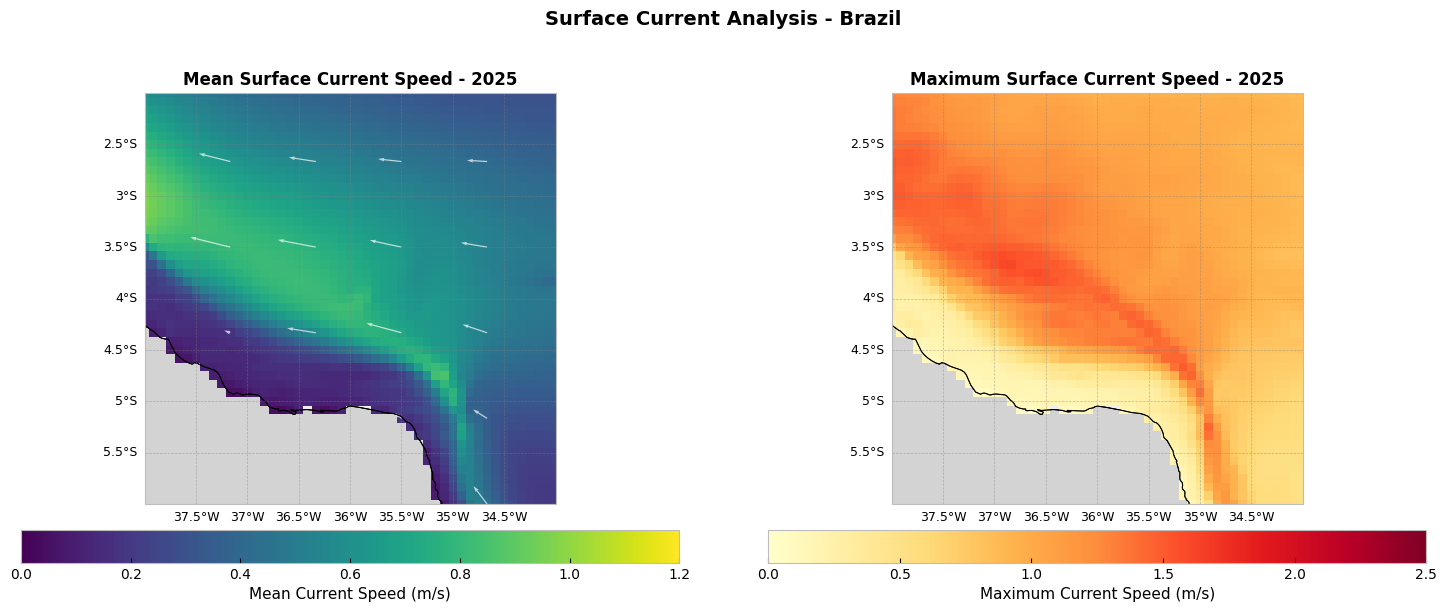

✓ Figure saved: img/surface_currents_analysis.png


In [23]:
# Plot mean and maximum surface current speed
fig = plt.figure(figsize=(16, 6))

# Subplot 1: Mean surface current speed
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.coastlines(resolution='10m', linewidth=0.8)

# Plot mean current speed
cs1 = ax1.pcolormesh(mean_current_speed.longitude, mean_current_speed.latitude, 
                      mean_current_speed, 
                      transform=ccrs.PlateCarree(),
                      cmap='viridis', vmin=0, vmax=1.2,
                      shading='auto')

# Add mean current vectors
skip = 10
ax1.quiver(mean_uo.longitude.values[::skip], mean_uo.latitude.values[::skip],
           mean_uo.values[::skip, ::skip], mean_vo.values[::skip, ::skip],
           transform=ccrs.PlateCarree(), 
           scale=8, width=0.003, alpha=0.7, color='white')

cbar1 = plt.colorbar(cs1, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.8)
cbar1.set_label('Mean Current Speed (m/s)', fontsize=11)

gl1 = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 9}
gl1.ylabel_style = {'size': 9}

ax1.set_title('Mean Surface Current Speed - 2025', fontsize=12, fontweight='bold')

# Subplot 2: Maximum surface current speed
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.coastlines(resolution='10m', linewidth=0.8)

# Plot maximum current speed
cs2 = ax2.pcolormesh(max_current_speed.longitude, max_current_speed.latitude, 
                      max_current_speed, 
                      transform=ccrs.PlateCarree(),
                      cmap='YlOrRd', vmin=0, vmax=2.5,
                      shading='auto')

cbar2 = plt.colorbar(cs2, ax=ax2, orientation='horizontal', pad=0.05, shrink=0.8)
cbar2.set_label('Maximum Current Speed (m/s)', fontsize=11)

gl2 = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False
gl2.xlabel_style = {'size': 9}
gl2.ylabel_style = {'size': 9}

ax2.set_title('Maximum Surface Current Speed - 2025', fontsize=12, fontweight='bold')

plt.suptitle('Surface Current Analysis - Brazil', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('img/surface_currents_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Figure saved: img/surface_currents_analysis.png")

## 6.2 Vertical current profiles

[Go back to the "Table of contents"](#Table-of-contents)

Understanding the vertical structure of currents is important for:
- Determining optimal deployment depth for current energy devices
- Assessing vertical shear that affects device design
- Understanding water column dynamics

Let's examine vertical current profiles at a location in the Brazil Current core.

In [24]:
# Select a location in the Brazil Current (approximate core location)
# Longitude: -36°E, Latitude: -4°S
lon_profile = -36.0
lat_profile = -4.0

print(f"Extracting vertical profiles at: {lat_profile}°N, {lon_profile}°E")

# Extract vertical profile at this location (time-mean)
profile_location = ds_phy.sel(longitude=lon_profile, latitude=lat_profile, method='nearest')
mean_profile = profile_location.current_speed.mean(dim='time')

print(f"✓ Vertical profile extracted")
print(f"  Depth range: {float(profile_location.depth.min()):.1f} - {float(profile_location.depth.max()):.1f} m")
print(f"  Number of depth levels: {len(profile_location.depth)}")

Extracting vertical profiles at: -4.0°N, -36.0°E
✓ Vertical profile extracted
  Depth range: 0.5 - 92.3 m
  Number of depth levels: 22


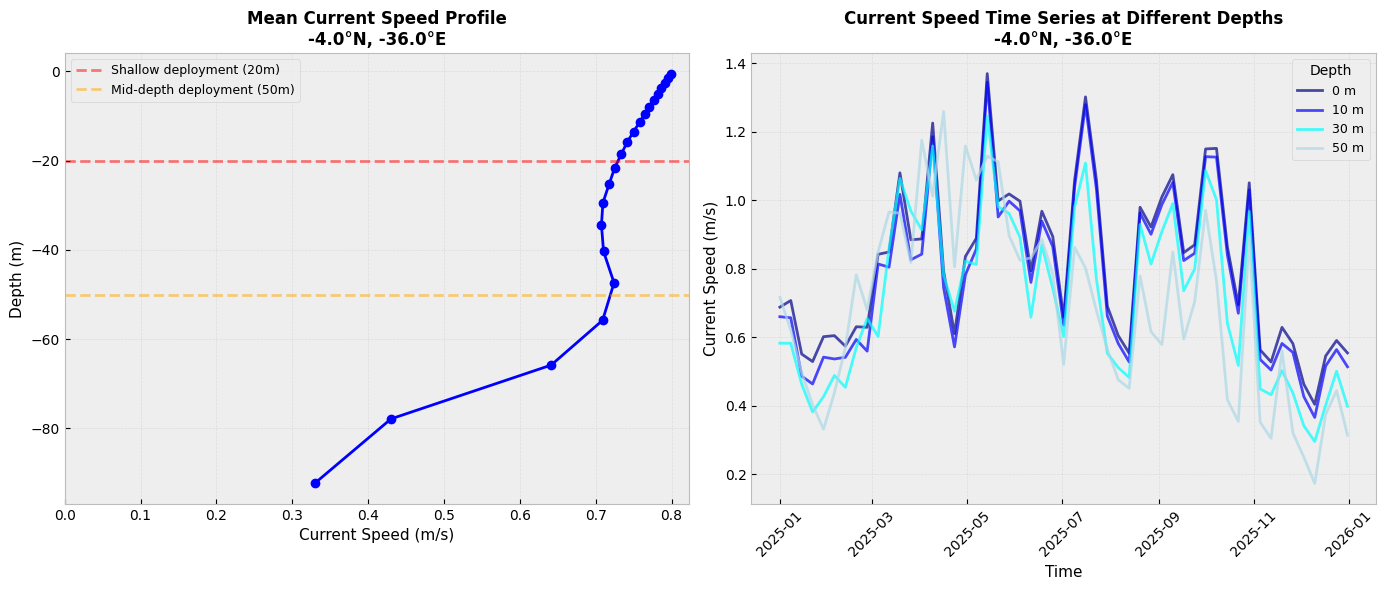

✓ Figure saved: img/vertical_current_profile.png


In [25]:
# Plot vertical current profile
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left panel: Mean current speed vs depth
ax1.plot(mean_profile.values, -mean_profile.depth.values, 'b-', linewidth=2, marker='o')
ax1.set_xlabel('Current Speed (m/s)', fontsize=11)
ax1.set_ylabel('Depth (m)', fontsize=11)
ax1.set_title(f'Mean Current Speed Profile\n{lat_profile}°N, {lon_profile}°E', 
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, None)

# Add reference lines for typical turbine depths
ax1.axhline(y=-20, color='r', linestyle='--', alpha=0.5, label='Shallow deployment (20m)')
ax1.axhline(y=-50, color='orange', linestyle='--', alpha=0.5, label='Mid-depth deployment (50m)')
ax1.legend(fontsize=9)

# Right panel: Time series of current speed at different depths
depths_to_plot = [0.49, 10, 30, 50]
colors_depth = ['darkblue', 'blue', 'cyan', 'lightblue']

for depth, color in zip(depths_to_plot, colors_depth):
    try:
        current_at_depth = profile_location.current_speed.sel(depth=depth, method='nearest')
        # Subsample time for clarity (plot every 7th day)
        ax2.plot(current_at_depth.time[::7], current_at_depth.values[::7], 
                color=color, alpha=0.7, label=f'{depth:.0f} m')
    except:
        pass

ax2.set_xlabel('Time', fontsize=11)
ax2.set_ylabel('Current Speed (m/s)', fontsize=11)
ax2.set_title(f'Current Speed Time Series at Different Depths\n{lat_profile}°N, {lon_profile}°E', 
              fontsize=12, fontweight='bold')
ax2.legend(title='Depth', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('img/vertical_current_profile.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Figure saved: img/vertical_current_profile.png")

## 6.3 Seasonal variability

[Go back to the "Table of contents"](#Table-of-contents)

Current energy resources vary seasonally due to changes in wind forcing, mesoscale eddy activity, and large-scale ocean circulation patterns. Understanding this variability is crucial for predicting annual energy production and planning maintenance windows.

In [26]:
# Calculate seasonal means (monthly averages)
print("Computing seasonal statistics...")

# Group by month and calculate monthly means
monthly_current = surface_currents.current_speed.resample(time='1MS').mean()

# Calculate spatial mean for each month
monthly_mean_speed = monthly_current.mean(dim=['latitude', 'longitude'])

# Calculate standard deviation for variability assessment
monthly_std_speed = monthly_current.std(dim=['latitude', 'longitude'])

print("✓ Seasonal statistics computed")
print(f"  Number of months analyzed: {len(monthly_mean_speed)}")
print(f"  Mean current speed range: {float(monthly_mean_speed.min()):.3f} - {float(monthly_mean_speed.max()):.3f} m/s")

Computing seasonal statistics...
✓ Seasonal statistics computed
  Number of months analyzed: 12
  Mean current speed range: 0.355 - 0.729 m/s


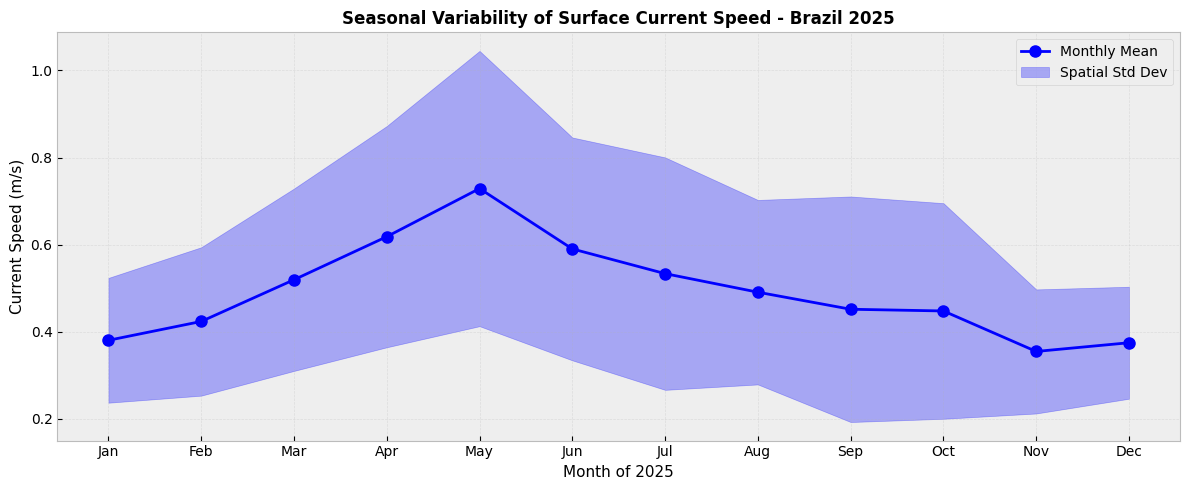

✓ Figure saved: img/seasonal_current_variability.png

Seasonal Summary:
  Highest mean current: Month 5 (0.729 m/s)
  Lowest mean current: Month 11 (0.355 m/s)
  Seasonal range: 0.374 m/s


In [27]:
# Plot seasonal variability
fig, ax = plt.subplots(figsize=(12, 5))

# Plot monthly mean with error bars showing spatial variability
months = np.arange(1, len(monthly_mean_speed) + 1)
ax.plot(months, monthly_mean_speed.values, 'b-o', linewidth=2, markersize=8, label='Monthly Mean')
ax.fill_between(months, 
                 (monthly_mean_speed - monthly_std_speed).values,
                 (monthly_mean_speed + monthly_std_speed).values,
                 alpha=0.3, color='blue', label='Spatial Std Dev')

ax.set_xlabel('Month of 2025', fontsize=11)
ax.set_ylabel('Current Speed (m/s)', fontsize=11)
ax.set_title('Seasonal Variability of Surface Current Speed - Brazil 2025', 
             fontsize=12, fontweight='bold')
ax.set_xticks(months)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][:len(months)])
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('img/seasonal_current_variability.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Figure saved: img/seasonal_current_variability.png")

# Print seasonal summary
print("\nSeasonal Summary:")
print(f"  Highest mean current: Month {int(monthly_mean_speed.argmax()) + 1} " +
      f"({float(monthly_mean_speed.max()):.3f} m/s)")
print(f"  Lowest mean current: Month {int(monthly_mean_speed.argmin()) + 1} " +
      f"({float(monthly_mean_speed.min()):.3f} m/s)")
print(f"  Seasonal range: {float(monthly_mean_speed.max() - monthly_mean_speed.min()):.3f} m/s")

# 7. Wave Climate Analysis

[Go back to the "Table of contents"](#Table-of-contents)

Wave energy represents a significant renewable resource along the Brazilian coast, particularly along the northeastern coast exposed to Atlantic trade wind-generated swells. Understanding the wave climate is essential for:

- Assessing wave energy resource potential
- Designing wave energy converters
- Evaluating extreme wave conditions for structural design
- Planning installation and maintenance operations

## 7.1 Significant wave height statistics

[Go back to the "Table of contents"](#Table-of-contents)

Let's analyze the statistical distribution of significant wave heights and identify areas with the highest wave energy potential.

In [28]:
# Calculate wave height statistics
print("Computing wave climate statistics...")

# Calculate temporal statistics
mean_wave_height = ds_wav.VHM0.mean(dim='time')
max_wave_height = ds_wav.VHM0.max(dim='time')
p95_wave_height = ds_wav.VHM0.quantile(0.95, dim='time')  # 95th percentile
p50_wave_height = ds_wav.VHM0.quantile(0.50, dim='time')  # Median

print("✓ Wave statistics computed")
print(f"\nSummary statistics (spatial averages):")
print(f"  Mean wave height: {float(mean_wave_height.mean()):.2f} m")
print(f"  Median wave height: {float(p50_wave_height.mean()):.2f} m")
print(f"  95th percentile: {float(p95_wave_height.mean()):.2f} m")
print(f"  Maximum wave height: {float(max_wave_height.max()):.2f} m")

Computing wave climate statistics...
✓ Wave statistics computed

Summary statistics (spatial averages):
  Mean wave height: 1.79 m
  Median wave height: 1.75 m
  95th percentile: 2.34 m
  Maximum wave height: 3.35 m


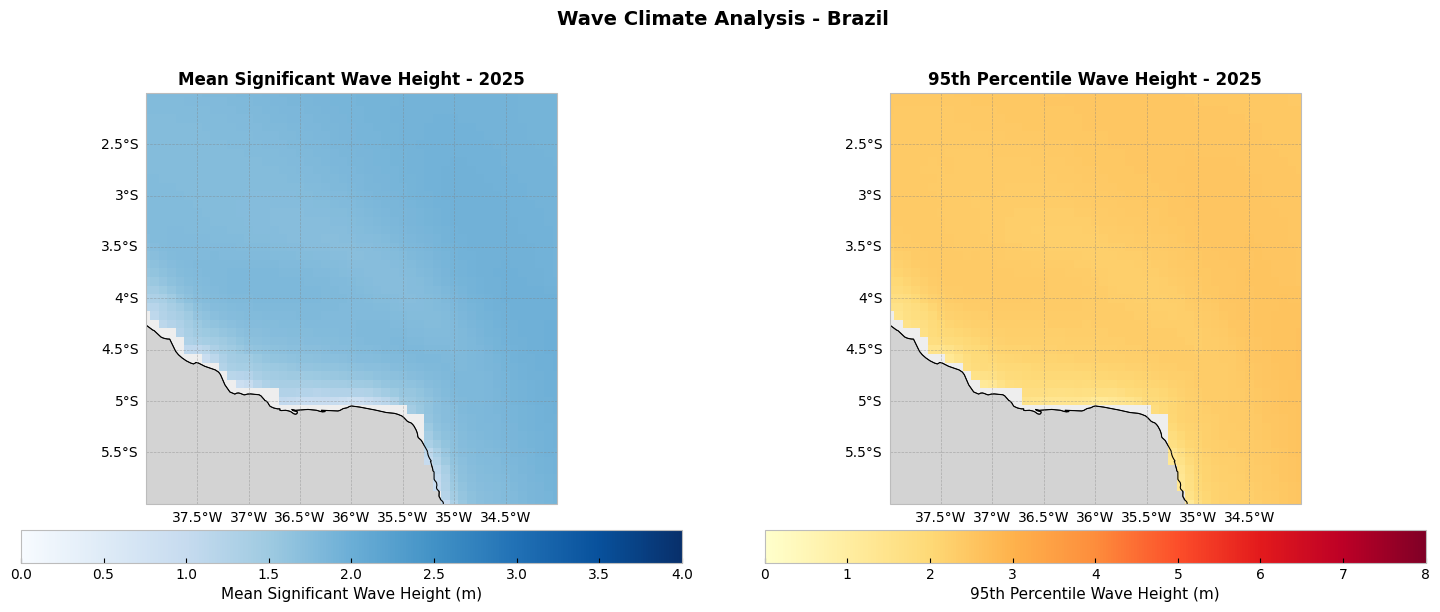

✓ Figure saved: img/wave_height_statistics.png


In [29]:
# Plot wave height statistics
fig = plt.figure(figsize=(16, 6))

# Subplot 1: Mean wave height
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax1.coastlines(resolution='10m', linewidth=0.8)

wave1 = ax1.pcolormesh(mean_wave_height.longitude, mean_wave_height.latitude, 
                        mean_wave_height, 
                        transform=ccrs.PlateCarree(),
                        cmap='Blues', vmin=0, vmax=4,
                        shading='auto')
cbar1 = plt.colorbar(wave1, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.8)
cbar1.set_label('Mean Significant Wave Height (m)', fontsize=11)

gl1 = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.right_labels = False

ax1.set_title('Mean Significant Wave Height - 2025', fontsize=12, fontweight='bold')

# Subplot 2: 95th percentile (extreme waves)
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax2.coastlines(resolution='10m', linewidth=0.8)

wave2 = ax2.pcolormesh(p95_wave_height.longitude, p95_wave_height.latitude, 
                        p95_wave_height, 
                        transform=ccrs.PlateCarree(),
                        cmap='YlOrRd', vmin=0, vmax=8,
                        shading='auto')
cbar2 = plt.colorbar(wave2, ax=ax2, orientation='horizontal', pad=0.05, shrink=0.8)
cbar2.set_label('95th Percentile Wave Height (m)', fontsize=11)

gl2 = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False

ax2.set_title('95th Percentile Wave Height - 2025', fontsize=12, fontweight='bold')

plt.suptitle('Wave Climate Analysis - Brazil', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('img/wave_height_statistics.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Figure saved: img/wave_height_statistics.png")

# 8. Sediment Transport Processes

[Go back to the "Table of contents"](#Table-of-contents)

Understanding sediment transport is crucial for assessing environmental impacts of marine energy installations. Sediment dynamics affect:

- Local morphology and bathymetry changes
- Water quality and turbidity
- Marine ecosystems and habitats
- Foundation stability for energy devices
- Potential scour around structures

We will compute key parameters that govern sediment transport:
- Bed shear stress from currents and waves
- Shields parameter for sediment mobility
- Sediment transport capacity
- Wave-induced resuspension

## 8.1 Bed shear stress computation

[Go back to the "Table of contents"](#Table-of-contents)

Bed shear stress ($\tau_b$) is the tangential force per unit area exerted by flowing water on the seafloor. It determines whether sediment will be eroded, transported, or deposited.

**Current-induced bed shear stress:**
$$\tau_c = \rho C_D U^2$$

Where:
- $\tau_c$ = Current-induced bed shear stress (Pa)
- $\rho$ = Water density (1025 kg/m³)
- $C_D$ = Drag coefficient (~0.0025 for rough beds)
- $U$ = Bottom current velocity (m/s)

**Wave-induced bed shear stress (approximation):**
$$\tau_w = \frac{1}{2} \rho f_w U_w^2$$

Where:
- $f_w$ = Wave friction factor (~0.015-0.03)
- $U_w$ = Wave orbital velocity at bed

In [30]:
# Calculate bed shear stress from currents
print("Computing bed shear stress...")

# Constants
rho_water = 1025  # kg/m³
C_D = 0.0025  # Drag coefficient (typical for sandy/rough beds)

# Select bottom currents (deepest available level or use surface as proxy)
# For simplicity, we'll use near-surface values as bottom currents are not always available
bottom_currents = ds_phy.sel(depth=0.49, method='nearest')

# Current-induced bed shear stress: τ_c = ρ * C_D * U²
tau_current = rho_water * C_D * (bottom_currents.current_speed ** 2)

# Calculate mean bed shear stress
mean_tau_current = tau_current.mean(dim='time')
max_tau_current = tau_current.max(dim='time')

print("✓ Current-induced bed shear stress computed")
print(f"\nBed Shear Stress Summary:")
print(f"  Mean bed shear stress: {float(mean_tau_current.mean()):.3f} Pa")
print(f"  Maximum bed shear stress: {float(max_tau_current.max()):.2f} Pa")

# Critical shear stress for typical sand (d50 = 0.2 mm)
tau_critical_sand = 0.15  # Pa (approximate for fine sand)
print(f"  Critical shear stress (fine sand): {tau_critical_sand} Pa")
print(f"  Areas exceeding critical stress: " +
      f"{float((mean_tau_current > tau_critical_sand).sum() / mean_tau_current.size * 100):.1f}%")

Computing bed shear stress...
✓ Current-induced bed shear stress computed

Bed Shear Stress Summary:
  Mean bed shear stress: 0.818 Pa
  Maximum bed shear stress: 6.59 Pa
  Critical shear stress (fine sand): 0.15 Pa
  Areas exceeding critical stress: 71.0%


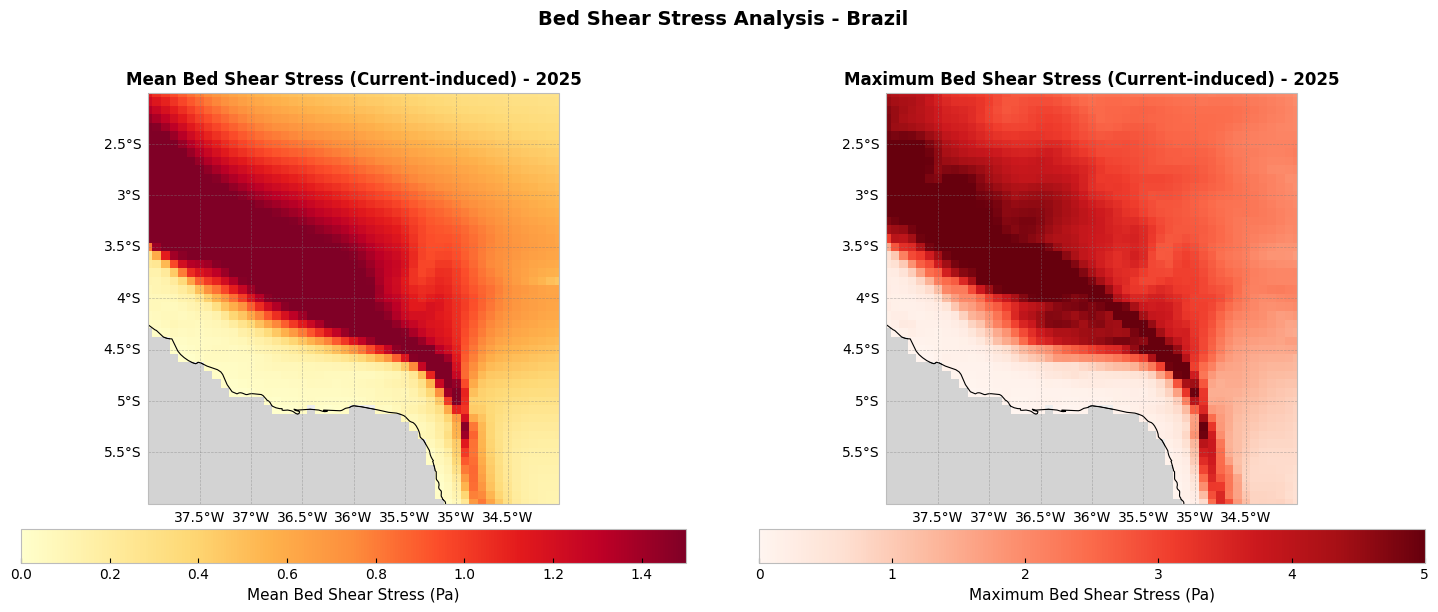

✓ Figure saved: img/bed_shear_stress.png


In [31]:
# Plot bed shear stress
fig = plt.figure(figsize=(16, 6))

# Subplot 1: Mean bed shear stress
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax1.coastlines(resolution='10m', linewidth=0.8)

tau1 = ax1.pcolormesh(mean_tau_current.longitude, mean_tau_current.latitude, 
                       mean_tau_current, 
                       transform=ccrs.PlateCarree(),
                       cmap='YlOrRd', vmin=0, vmax=1.5,
                       shading='auto')
cbar1 = plt.colorbar(tau1, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.8)
cbar1.set_label('Mean Bed Shear Stress (Pa)', fontsize=11)

gl1 = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.right_labels = False

ax1.set_title('Mean Bed Shear Stress (Current-induced) - 2025', fontsize=12, fontweight='bold')

# Subplot 2: Maximum bed shear stress
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax2.coastlines(resolution='10m', linewidth=0.8)

tau2 = ax2.pcolormesh(max_tau_current.longitude, max_tau_current.latitude, 
                       max_tau_current, 
                       transform=ccrs.PlateCarree(),
                       cmap='Reds', vmin=0, vmax=5,
                       shading='auto')
cbar2 = plt.colorbar(tau2, ax=ax2, orientation='horizontal', pad=0.05, shrink=0.8)
cbar2.set_label('Maximum Bed Shear Stress (Pa)', fontsize=11)

gl2 = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False

ax2.set_title('Maximum Bed Shear Stress (Current-induced) - 2025', fontsize=12, fontweight='bold')

plt.suptitle('Bed Shear Stress Analysis - Brazil', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('img/bed_shear_stress.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Figure saved: img/bed_shear_stress.png")

## 8.2 Shields parameter for sediment mobility

[Go back to the "Table of contents"](#Table-of-contents)

The Shields parameter ($\theta$) quantifies sediment mobility by comparing the applied bed shear stress to the immersed weight of sediment particles:

$$\theta = \frac{\tau_b}{(\rho_s - \rho)gd}$$

Where:
- $\tau_b$ = Bed shear stress (Pa)
- $\rho_s$ = Sediment density (typically 2650 kg/m³ for quartz)
- $\rho$ = Water density (1025 kg/m³)
- $g$ = Gravitational acceleration (9.81 m/s²)
- $d$ = Sediment grain diameter (m)

**Critical Shields parameter** ($\theta_c$): Sediment begins to move when $\theta > \theta_c \approx 0.05$ for typical marine sediments (Soulsby, 1997).

We calculate the Shields parameter for different sediment classes:
- **Fine sand**: d = 0.125 mm
- **Medium sand**: d = 0.25 mm
- **Coarse sand**: d = 0.5 mm
- **Gravel**: d = 2 mm

In [32]:
# Calculate Shields parameter for different sediment sizes
rho_sediment = 2650  # kg/m³ (quartz sediment)
rho_water = 1025     # kg/m³
g = 9.81             # m/s²
theta_critical = 0.05  # Critical Shields parameter

# Sediment grain diameters (in meters)
sediment_classes = {
    'Fine sand (0.125 mm)': 0.125e-3,
    'Medium sand (0.25 mm)': 0.25e-3,
    'Coarse sand (0.5 mm)': 0.5e-3,
    'Gravel (2 mm)': 2.0e-3
}

# Calculate Shields parameter for each sediment class
shields_params = {}
for name, d in sediment_classes.items():
    theta = tau_current / ((rho_sediment - rho_water) * g * d)
    shields_params[name] = theta
    
    # Calculate mean and percentage above critical
    mean_theta = theta.mean(dim='time')
    mobility_area = (mean_theta > theta_critical).sum() / mean_theta.size * 100
    
    print(f"\n{name}:")
    print(f"  Mean Shields parameter: {float(mean_theta.mean()):.3f}")
    print(f"  Max Shields parameter: {float(theta.max()):.2f}")
    print(f"  Area with mobility (θ > {theta_critical}): {float(mobility_area):.1f}%")

print(f"\n{'='*60}")
print("Interpretation:")
print(f"Areas with θ > {theta_critical} indicate sediment transport conditions")
print("Higher Shields values = stronger sediment mobility")


Fine sand (0.125 mm):
  Mean Shields parameter: 0.410
  Max Shields parameter: 3.31
  Area with mobility (θ > 0.05): 73.8%

Medium sand (0.25 mm):
  Mean Shields parameter: 0.205
  Max Shields parameter: 1.65
  Area with mobility (θ > 0.05): 69.1%

Coarse sand (0.5 mm):
  Mean Shields parameter: 0.103
  Max Shields parameter: 0.83
  Area with mobility (θ > 0.05): 60.6%

Gravel (2 mm):
  Mean Shields parameter: 0.026
  Max Shields parameter: 0.21
  Area with mobility (θ > 0.05): 10.6%

Interpretation:
Areas with θ > 0.05 indicate sediment transport conditions
Higher Shields values = stronger sediment mobility


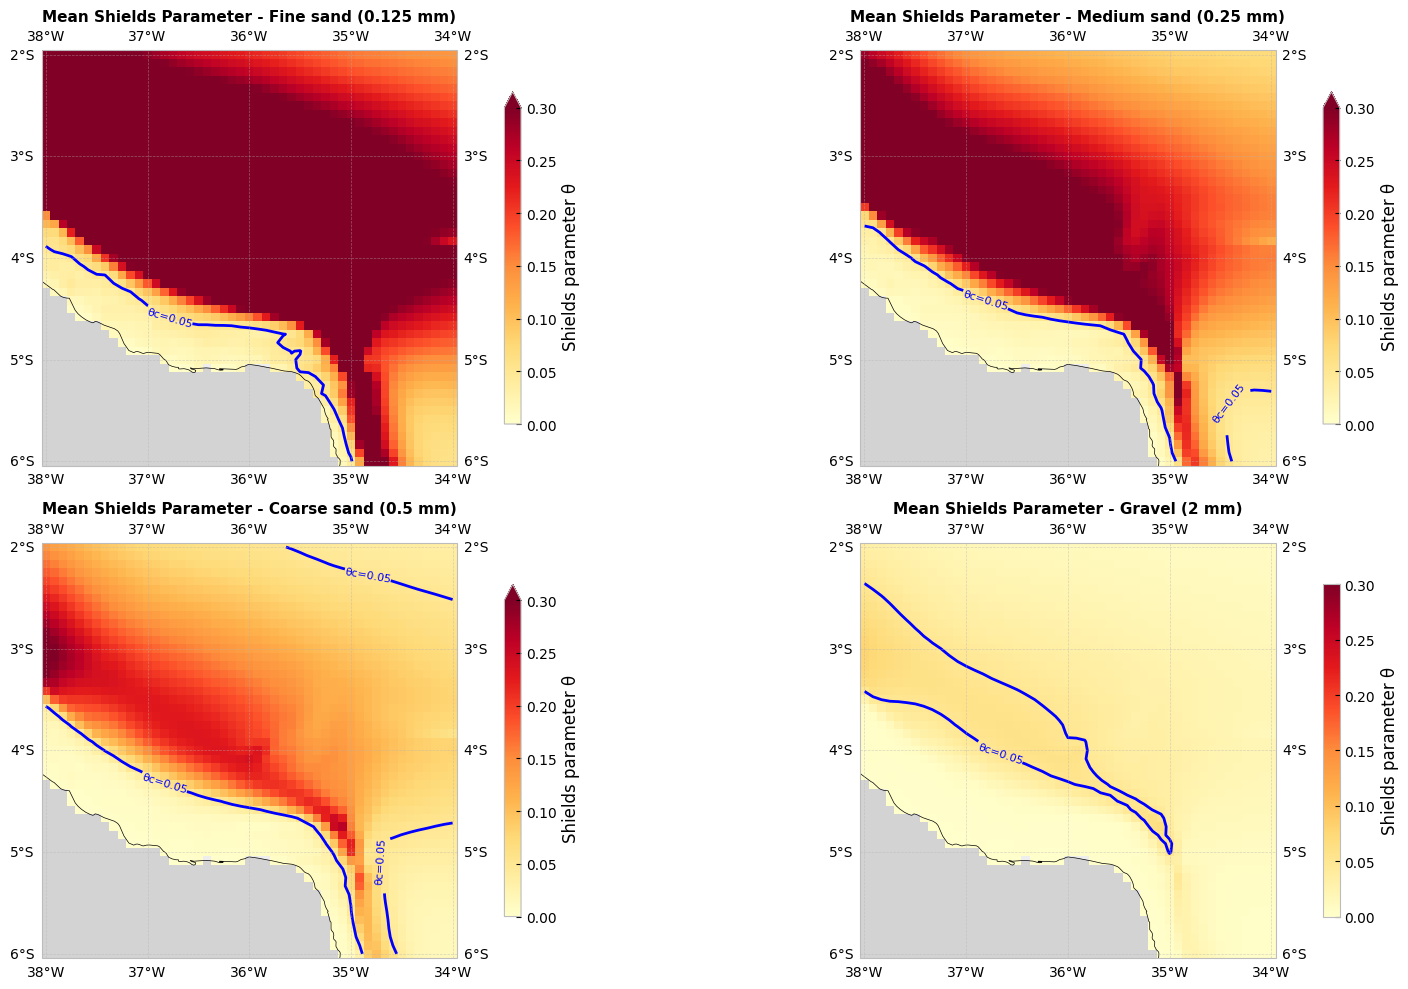

Figure saved as: img/shields_parameter.png

Blue contour shows critical threshold (θc = 0.05)
Values above this line indicate active sediment transport


In [33]:
# Plot Shields parameter for different sediment classes
fig = plt.figure(figsize=(18, 10))

sediment_list = list(sediment_classes.keys())

for idx, name in enumerate(sediment_list):
    ax = plt.subplot(2, 2, idx+1, projection=ccrs.PlateCarree())
    
    # Plot mean Shields parameter
    mean_theta = shields_params[name].mean(dim='time')
    
    im = mean_theta.plot(ax=ax, cmap='YlOrRd', vmin=0, vmax=0.3,
                         cbar_kwargs={'label': 'Shields parameter θ', 'shrink': 0.8},
                         add_colorbar=True)
    
    # Add contour for critical threshold
    contour = ax.contour(mean_theta.longitude, mean_theta.latitude, mean_theta,
                         levels=[theta_critical], colors='blue', linewidths=2)
    ax.clabel(contour, inline=True, fontsize=8, fmt='θc=%.2f')
    
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
    ax.set_title(f'Mean Shields Parameter - {name}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.savefig('img/shields_parameter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as: img/shields_parameter.png")
print("\nBlue contour shows critical threshold (θc = 0.05)")
print("Values above this line indicate active sediment transport")

## 8.3 Sediment transport capacity

[Go back to the "Table of contents"](#Table-of-contents)

Sediment transport capacity quantifies the amount of sediment that can be transported by currents and waves. We use empirical formulations for different transport mechanisms:

### 8.3.1 Current-induced transport (Meyer-Peter Müller formula)

For bedload transport by currents:

$$q_{b,current} = 8(\theta - \theta_c)^{1.5} \sqrt{(s-1)gd^3}$$

Where:
- $q_b$ = Bedload transport rate (m²/s)
- $s = \rho_s/\rho$ = Relative density
- $\theta$ = Shields parameter
- $\theta_c$ = Critical Shields parameter (0.05)

### 8.3.2 Wave-induced transport

Wave orbital velocity at the bed (from linear wave theory):

$$U_w = \frac{\pi H}{T \sinh(kh)}$$

Wave-induced bed shear stress:

$$\tau_w = \frac{1}{2}\rho f_w U_w^2$$

Where $f_w$ = 0.00251 exp(5.21(A_w/k_s)^{-0.19})$ is the wave friction factor, $A_w = U_w T/(2\pi)$ is the wave orbital amplitude, and $k_s$ is the bed roughness (typically 2.5d₅₀).

### 8.3.3 Combined wave-current transport

Combined bed shear stress (Soulsby, 1997):

$$\tau_{cw} = \tau_c \left[1 + 1.2\left(\frac{\tau_w}{\tau_c + \tau_w}\right)^{3.2}\right]$$

This accounts for non-linear wave-current interaction effects.

In [34]:
# Calculate wave orbital velocity and wave-induced bed shear stress
# Using medium sand (d = 0.25 mm) as representative grain size
d50 = 0.25e-3  # m
s = rho_sediment / rho_water  # Relative density
theta_c = 0.05

# Wave parameters from ds_wav
H = ds_wav['VHM0']  # Significant wave height (m)
T = ds_wav['VTPK']  # Peak wave period (s)

# Approximate water depth (using a representative depth of 50m for continental shelf)
# In a real application, this should come from bathymetry data
h = 50  # m (approximate shelf depth)

# Wave number (deep water approximation: k ≈ 2π/L where L = gT²/(2π))
L = g * T**2 / (2 * np.pi)  # Deep water wavelength
k = 2 * np.pi / L

# Wave orbital velocity at bed
U_wave = (np.pi * H) / (T * np.sinh(k * h))

# Wave orbital amplitude
A_wave = U_wave * T / (2 * np.pi)

# Bed roughness (Nikuradse roughness)
k_s = 2.5 * d50  # m

# Wave friction factor (Swart, 1974)
# f_w = 0.00251 * exp(5.21 * (A_w/k_s)^-0.19)
f_w = 0.00251 * np.exp(5.21 * (A_wave / k_s)**(-0.19))
# Limit f_w to reasonable range
f_w = f_w.where(f_w < 0.3, 0.3)
f_w = f_w.where(f_w > 0.001, 0.001)

# Wave-induced bed shear stress
tau_wave = 0.5 * rho_water * f_w * U_wave**2

print("Wave-induced bed shear stress:")
print(f"Mean tau_wave: {float(tau_wave.mean()):.3f} Pa")
print(f"Max tau_wave: {float(tau_wave.max()):.2f} Pa")
print(f"Percentage exceeding critical stress (0.15 Pa): {float((tau_wave > 0.15).sum() / tau_wave.size * 100):.1f}%")

Wave-induced bed shear stress:
Mean tau_wave: 0.179 Pa
Max tau_wave: 1.82 Pa
Percentage exceeding critical stress (0.15 Pa): 25.2%


In [35]:
# Calculate combined wave-current bed shear stress (Soulsby, 1997)
# Need to interpolate current data to wave time/space grid
# Resample current shear stress to match wave data temporal resolution

# Take time mean to match spatial analysis
mean_tau_c = tau_current.mean(dim='time')
mean_tau_w = tau_wave.mean(dim='time')

# Combined bed shear stress (Soulsby, 1997)
# tau_cw = tau_c * [1 + 1.2 * (tau_w/(tau_c + tau_w))^3.2]
tau_combined = mean_tau_c * (1 + 1.2 * (mean_tau_w / (mean_tau_c + mean_tau_w))**3.2)

print("Combined wave-current bed shear stress:")
print(f"Mean tau_combined: {float(tau_combined.mean()):.3f} Pa")
print(f"Max tau_combined: {float(tau_combined.max()):.2f} Pa")
print(f"\nEnhancement factor (tau_combined/tau_current):")
enhancement = tau_combined / mean_tau_c
print(f"Mean: {float(enhancement.mean()):.2f}x")
print(f"Max: {float(enhancement.max()):.2f}x")

# Calculate bedload transport rate for medium sand (Meyer-Peter Müller)
# q_b = 8 * (theta - theta_c)^1.5 * sqrt((s-1)*g*d^3)
theta_combined = tau_combined / ((rho_sediment - rho_water) * g * d50)
theta_excess = (theta_combined - theta_c).where(theta_combined > theta_c, 0)
q_bedload = 8 * theta_excess**1.5 * np.sqrt((s - 1) * g * d50**3)

print(f"\nBedload transport capacity (medium sand, 0.25mm):")
print(f"Mean transport rate: {float(q_bedload.mean()):.2e} m²/s")
print(f"Max transport rate: {float(q_bedload.max()):.2e} m²/s")
print(f"Area with active transport: {float((q_bedload > 0).sum() / q_bedload.size * 100):.1f}%")

Combined wave-current bed shear stress:
Mean tau_combined: 0.822 Pa
Max tau_combined: 2.51 Pa

Enhancement factor (tau_combined/tau_current):
Mean: 1.05x
Max: 1.48x

Bedload transport capacity (medium sand, 0.25mm):
Mean transport rate: 7.98e-06 m²/s
Max transport rate: 5.51e-05 m²/s
Area with active transport: 69.2%


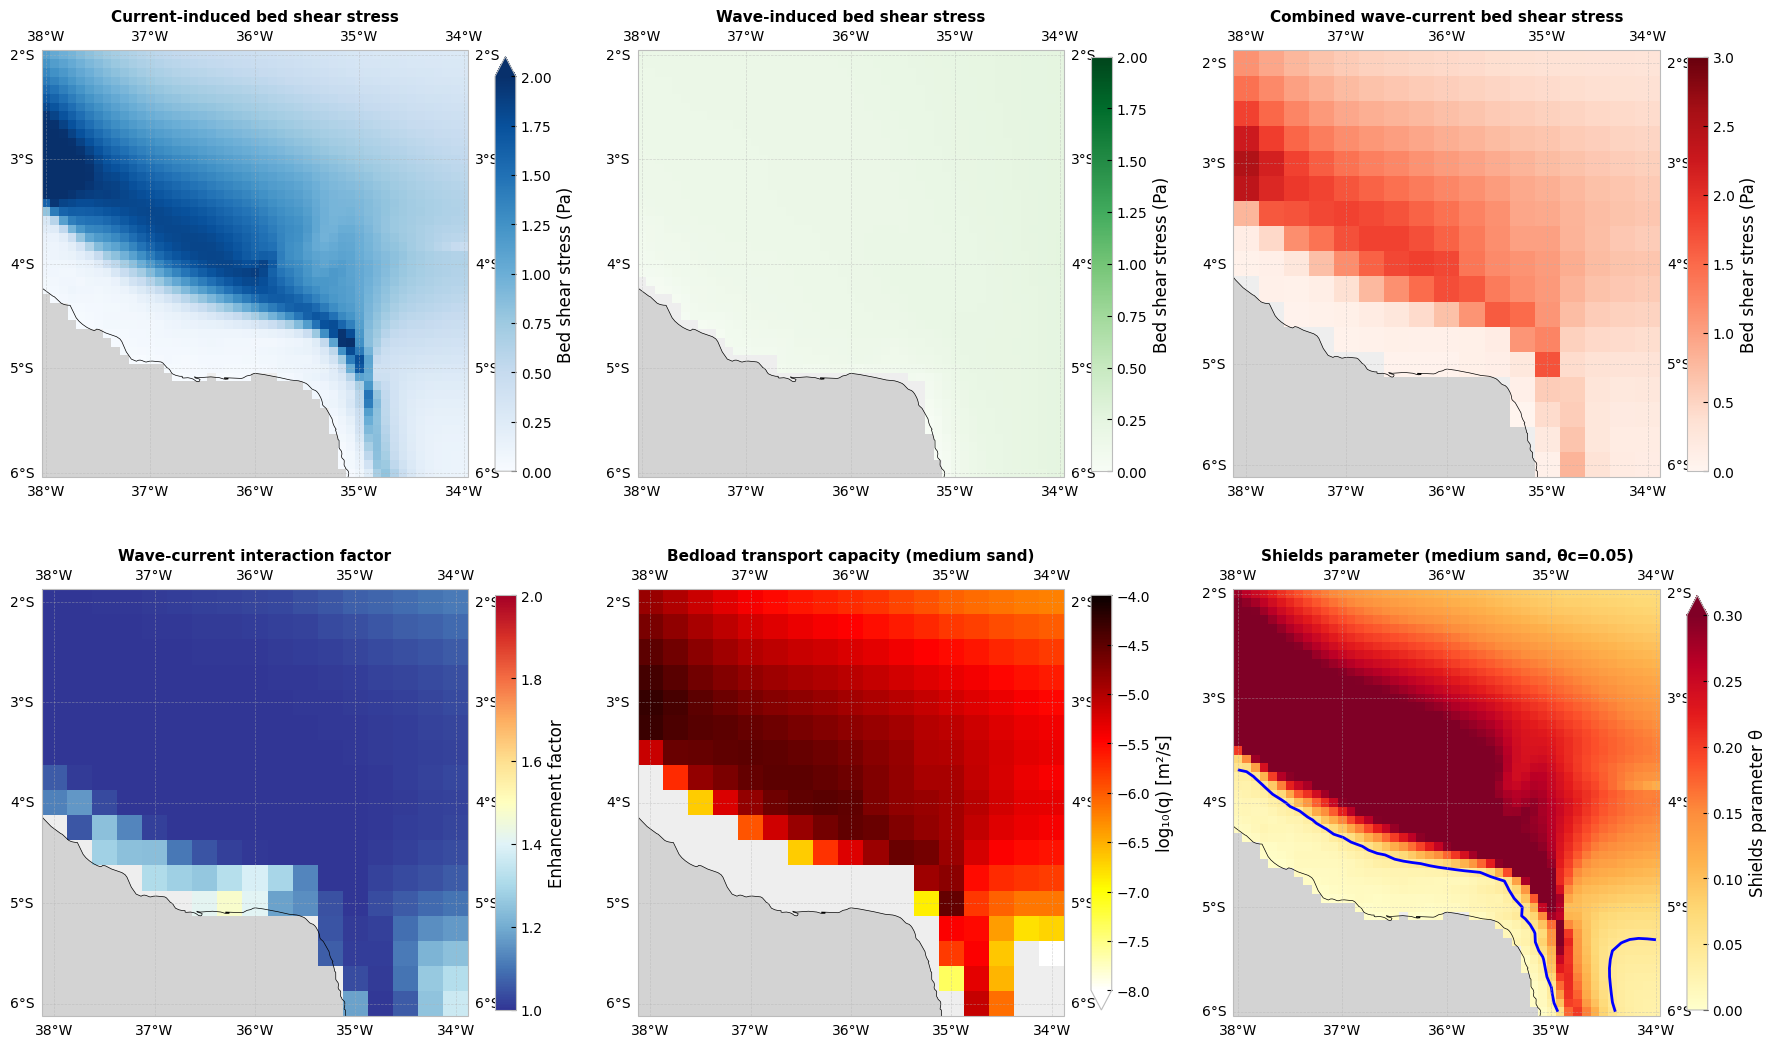

Figure saved as: img/sediment_transport_capacity.png


In [36]:
# Plot comparison of current, wave, and combined bed shear stress
fig = plt.figure(figsize=(18, 11))

# Current-induced bed shear stress
ax1 = plt.subplot(2, 3, 1, projection=ccrs.PlateCarree())
cs1 = mean_tau_c.plot(ax=ax1, cmap='Blues', vmin=0, vmax=2,
                      cbar_kwargs={'label': 'Bed shear stress (Pa)', 'shrink': 0.8})
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax1.set_title('Current-induced bed shear stress', fontsize=11, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Wave-induced bed shear stress
ax2 = plt.subplot(2, 3, 2, projection=ccrs.PlateCarree())
cs2 = mean_tau_w.plot(ax=ax2, cmap='Greens', vmin=0, vmax=2,
                      cbar_kwargs={'label': 'Bed shear stress (Pa)', 'shrink': 0.8})
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax2.set_title('Wave-induced bed shear stress', fontsize=11, fontweight='bold')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Combined bed shear stress
ax3 = plt.subplot(2, 3, 3, projection=ccrs.PlateCarree())
cs3 = tau_combined.plot(ax=ax3, cmap='Reds', vmin=0, vmax=3,
                        cbar_kwargs={'label': 'Bed shear stress (Pa)', 'shrink': 0.8})
ax3.coastlines(resolution='10m')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax3.set_title('Combined wave-current bed shear stress', fontsize=11, fontweight='bold')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')

# Enhancement factor
ax4 = plt.subplot(2, 3, 4, projection=ccrs.PlateCarree())
cs4 = enhancement.plot(ax=ax4, cmap='RdYlBu_r', vmin=1, vmax=2,
                       cbar_kwargs={'label': 'Enhancement factor', 'shrink': 0.8})
ax4.coastlines(resolution='10m')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax4.set_title('Wave-current interaction factor', fontsize=11, fontweight='bold')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')

# Bedload transport capacity
ax5 = plt.subplot(2, 3, 5, projection=ccrs.PlateCarree())
# Use log scale for transport rate
q_bedload_log = np.log10(q_bedload.where(q_bedload > 0))
cs5 = q_bedload_log.plot(ax=ax5, cmap='hot_r', vmin=-8, vmax=-4,
                         cbar_kwargs={'label': 'log₁₀(q) [m²/s]', 'shrink': 0.8})
ax5.coastlines(resolution='10m')
ax5.add_feature(cfeature.LAND, facecolor='lightgray')
ax5.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax5.set_title('Bedload transport capacity (medium sand)', fontsize=11, fontweight='bold')
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Latitude')

# Shields parameter for medium sand
ax6 = plt.subplot(2, 3, 6, projection=ccrs.PlateCarree())
theta_plot = shields_params['Medium sand (0.25 mm)'].mean(dim='time')
cs6 = theta_plot.plot(ax=ax6, cmap='YlOrRd', vmin=0, vmax=0.3,
                      cbar_kwargs={'label': 'Shields parameter θ', 'shrink': 0.8})
contour = ax6.contour(theta_plot.longitude, theta_plot.latitude, theta_plot,
                      levels=[theta_critical], colors='blue', linewidths=2)
ax6.coastlines(resolution='10m')
ax6.add_feature(cfeature.LAND, facecolor='lightgray')
ax6.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax6.set_title('Shields parameter (medium sand, θc=0.05)', fontsize=11, fontweight='bold')
ax6.set_xlabel('Longitude')
ax6.set_ylabel('Latitude')

plt.tight_layout()
plt.savefig('img/sediment_transport_capacity.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as: img/sediment_transport_capacity.png")

## 8.4 Wave-induced sediment resuspension

[Go back to the "Table of contents"](#Table-of-contents)

Wave action can suspend sediment into the water column through bottom boundary layer dynamics. The resuspension potential depends on:

### Resuspension criterion

Sediment resuspension occurs when the wave-induced bed shear stress exceeds the critical erosion threshold:

$$\tau_w > \tau_{ce}$$

where $\tau_{ce}$ is the critical shear stress for erosion (typically 1.5-2.0 times $\tau_c$ for deposition).

### Reference concentration

The reference concentration at the bed (van Rijn, 1984):

$$C_0 = 0.015 \frac{d_{50}}{a} \frac{T^{1.5}}{D^{0.3}}$$

where:
- $a$ = Reference height (typically $a = 2d_{50}$)
- $T = (\theta - \theta_c)/\theta_c$ = Excess Shields parameter
- $D = d_{50}/\sqrt{(s-1)gd_{50}}$ = Dimensionless grain size

### Suspended sediment concentration profile

The vertical distribution follows the Rouse profile:

$$C(z) = C_0 \left(\frac{h-z}{z}\frac{a}{h-a}\right)^{R}$$

where $R = w_s/(\kappa u_*)$ is the Rouse number, $w_s$ is settling velocity, $\kappa = 0.41$ is von Kármán constant, and $u_* = \sqrt{\tau/\rho}$ is shear velocity.

In [37]:
# Calculate wave-induced resuspension potential
# Critical shear stress for erosion (1.5x deposition threshold)
tau_ce = 1.5 * tau_critical_sand  # Pa

# Resuspension potential: areas where wave stress exceeds erosion threshold
resuspension_potential = (tau_wave > tau_ce).astype(float)
mean_resuspension = resuspension_potential.mean(dim='time')

print("Wave-induced resuspension analysis:")
print(f"Critical erosion stress: {tau_ce:.3f} Pa")
print(f"Mean area with resuspension potential: {float(mean_resuspension.mean() * 100):.1f}%")
print(f"Max area with resuspension potential: {float(mean_resuspension.max() * 100):.1f}%")

# Calculate settling velocity for medium sand (Soulsby, 1997)
# w_s = (nu/d) * [sqrt(10.36^2 + 1.049*D*^3) - 10.36]
nu = 1.36e-6  # kinematic viscosity (m²/s) at 10°C
D_star = d50 * ((s - 1) * g / nu**2)**(1/3)  # Dimensionless grain size
w_s = (nu / d50) * (np.sqrt(10.36**2 + 1.049 * D_star**3) - 10.36)

print(f"\nSediment properties (medium sand, d50 = {d50*1000:.2f} mm):")
print(f"Dimensionless grain size D*: {D_star:.2f}")
print(f"Settling velocity w_s: {w_s:.4f} m/s ({w_s*1000:.2f} mm/s)")

# Calculate shear velocity from combined bed shear stress
u_star = np.sqrt(tau_combined / rho_water)

print(f"\nShear velocity u*:")
print(f"Mean: {float(u_star.mean()):.4f} m/s")
print(f"Max: {float(u_star.max()):.4f} m/s")

# Rouse number (suspension parameter)
kappa = 0.41  # von Kármán constant
Rouse_number = w_s / (kappa * u_star)

print(f"\nRouse number (R = w_s/(κu*)):")
print(f"Mean: {float(Rouse_number.mean()):.2f}")
print(f"Min: {float(Rouse_number.min()):.2f}")
print(f"\nInterpretation:")
print("  R < 0.8: Suspended load dominant (remains in suspension)")
print("  0.8 < R < 2.5: Mixed load (suspended + bedload)")
print("  R > 2.5: Bedload dominant (settles quickly)")

# Reference concentration (van Rijn, 1984)
a = 2 * d50  # Reference height (m)
theta_excess_vr = (theta_combined - theta_c).where(theta_combined > theta_c, 0) / theta_c
T_vr = theta_excess_vr  # Excess transport parameter
C0 = 0.015 * (d50 / a) * (T_vr**1.5) / (D_star**0.3)

print(f"\nReference concentration at bed:")
print(f"Mean C0: {float(C0.mean()):.2e} (volume fraction)")
print(f"Max C0: {float(C0.max()):.2e} (volume fraction)")
print(f"Area with significant suspension (C0 > 1e-4): {float((C0 > 1e-4).sum() / C0.size * 100):.1f}%")

Wave-induced resuspension analysis:
Critical erosion stress: 0.225 Pa
Mean area with resuspension potential: 20.1%
Max area with resuspension potential: 39.0%

Sediment properties (medium sand, d50 = 0.25 mm):
Dimensionless grain size D*: 5.08
Settling velocity w_s: 0.0288 m/s (28.82 mm/s)

Shear velocity u*:
Mean: 0.0265 m/s
Max: 0.0495 m/s

Rouse number (R = w_s/(κu*)):
Mean: 3.25
Min: 1.42

Interpretation:
  R < 0.8: Suspended load dominant (remains in suspension)
  0.8 < R < 2.5: Mixed load (suspended + bedload)
  R > 2.5: Bedload dominant (settles quickly)

Reference concentration at bed:
Mean C0: 2.63e-02 (volume fraction)
Max C0: 1.82e-01 (volume fraction)
Area with significant suspension (C0 > 1e-4): 68.9%


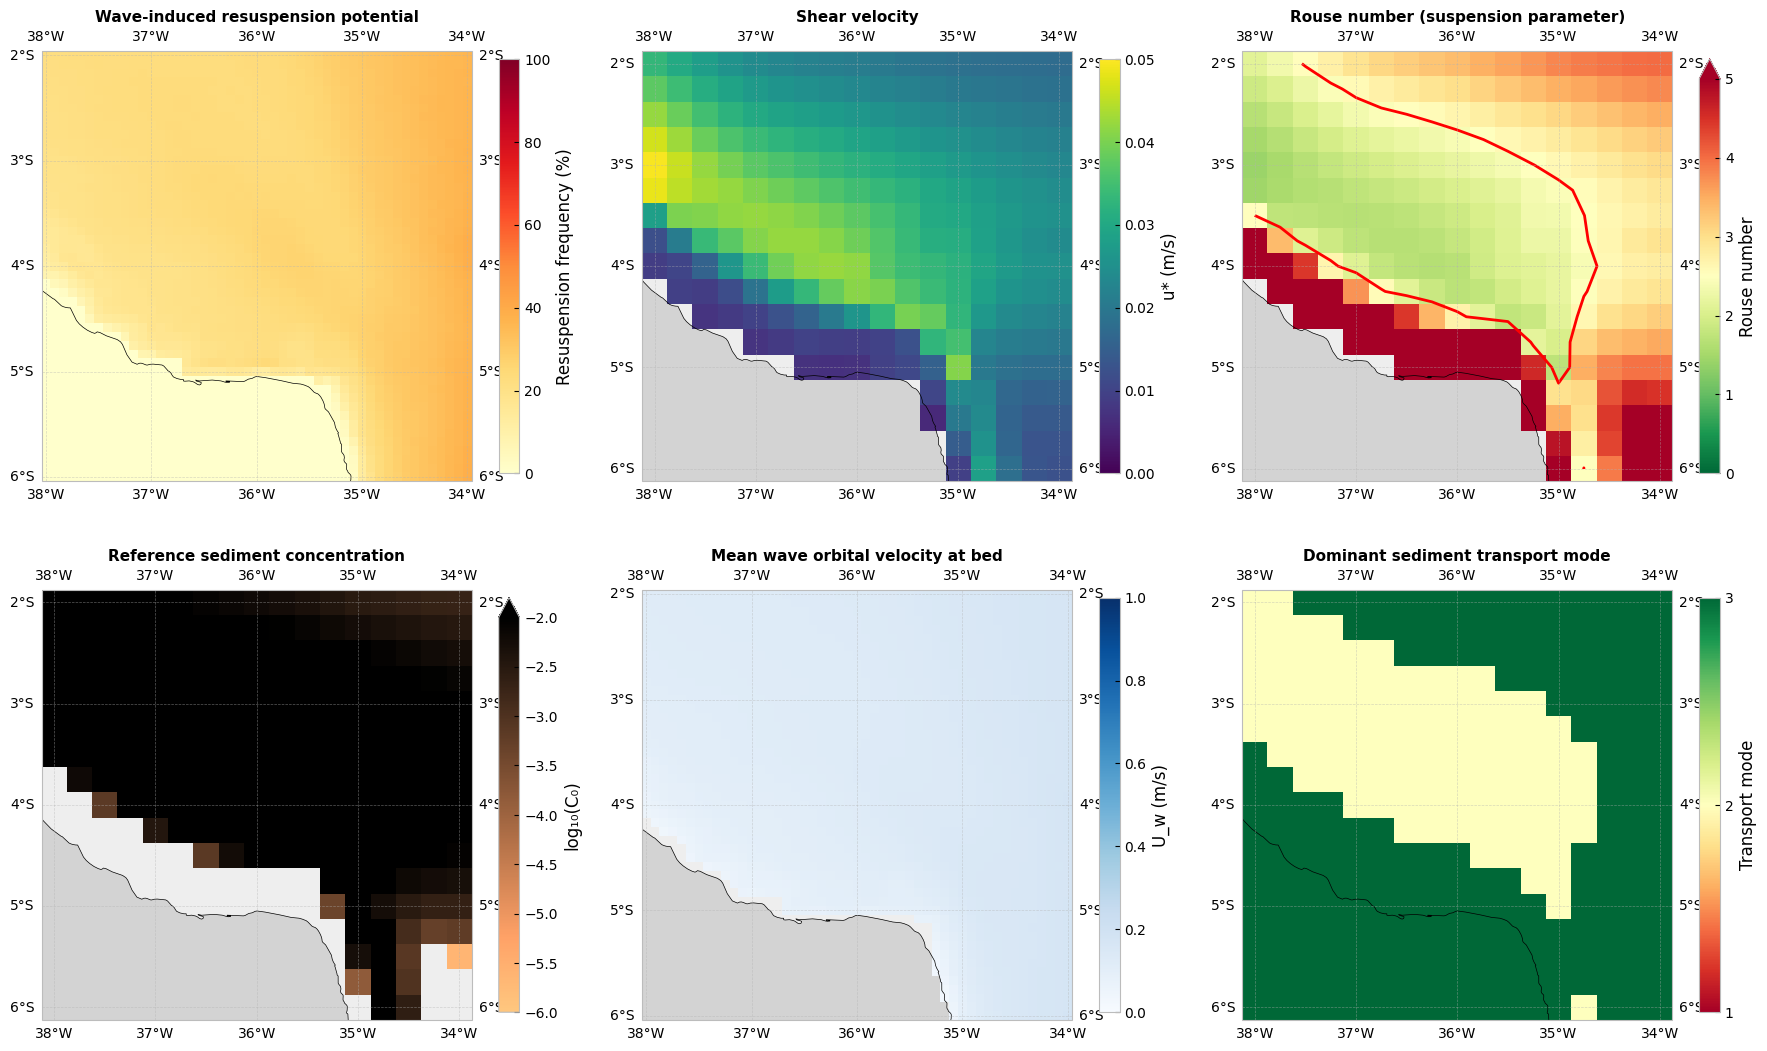


Figure saved as: img/wave_resuspension.png

Transport mode: 1=Suspended (green), 2=Mixed (yellow), 3=Bedload (red)


In [38]:
# Plot resuspension analysis
fig = plt.figure(figsize=(18, 11))

# Resuspension potential (% of time)
ax1 = plt.subplot(2, 3, 1, projection=ccrs.PlateCarree())
cs1 = (mean_resuspension * 100).plot(ax=ax1, cmap='YlOrRd', vmin=0, vmax=100,
                                      cbar_kwargs={'label': 'Resuspension frequency (%)', 'shrink': 0.8})
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax1.set_title('Wave-induced resuspension potential', fontsize=11, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Shear velocity
ax2 = plt.subplot(2, 3, 2, projection=ccrs.PlateCarree())
cs2 = u_star.plot(ax=ax2, cmap='viridis', vmin=0, vmax=0.05,
                  cbar_kwargs={'label': 'u* (m/s)', 'shrink': 0.8})
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax2.set_title('Shear velocity', fontsize=11, fontweight='bold')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Rouse number
ax3 = plt.subplot(2, 3, 3, projection=ccrs.PlateCarree())
cs3 = Rouse_number.plot(ax=ax3, cmap='RdYlGn_r', vmin=0, vmax=5,
                        cbar_kwargs={'label': 'Rouse number', 'shrink': 0.8})
# Add contours for transport mode boundaries
ax3.contour(Rouse_number.longitude, Rouse_number.latitude, Rouse_number,
           levels=[0.8, 2.5], colors=['blue', 'red'], linewidths=2)
ax3.coastlines(resolution='10m')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax3.set_title('Rouse number (suspension parameter)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')

# Reference concentration (log scale)
ax4 = plt.subplot(2, 3, 4, projection=ccrs.PlateCarree())
C0_log = np.log10(C0.where(C0 > 0))
cs4 = C0_log.plot(ax=ax4, cmap='copper_r', vmin=-6, vmax=-2,
                  cbar_kwargs={'label': 'log₁₀(C₀)', 'shrink': 0.8})
ax4.coastlines(resolution='10m')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax4.set_title('Reference sediment concentration', fontsize=11, fontweight='bold')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')

# Wave orbital velocity
ax5 = plt.subplot(2, 3, 5, projection=ccrs.PlateCarree())
mean_U_wave = U_wave.mean(dim='time')
cs5 = mean_U_wave.plot(ax=ax5, cmap='Blues', vmin=0, vmax=1,
                       cbar_kwargs={'label': 'U_w (m/s)', 'shrink': 0.8})
ax5.coastlines(resolution='10m')
ax5.add_feature(cfeature.LAND, facecolor='lightgray')
ax5.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax5.set_title('Mean wave orbital velocity at bed', fontsize=11, fontweight='bold')
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Latitude')

# Transport mode classification
ax6 = plt.subplot(2, 3, 6, projection=ccrs.PlateCarree())
# Classify: 1 = suspended load, 2 = mixed load, 3 = bedload
transport_mode = xr.where(Rouse_number < 0.8, 1,
                 xr.where(Rouse_number < 2.5, 2, 3))
cs6 = transport_mode.plot(ax=ax6, cmap='RdYlGn', vmin=1, vmax=3,
                          cbar_kwargs={'label': 'Transport mode', 'shrink': 0.8,
                                      'ticks': [1, 2, 3]})
ax6.coastlines(resolution='10m')
ax6.add_feature(cfeature.LAND, facecolor='lightgray')
ax6.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax6.set_title('Dominant sediment transport mode', fontsize=11, fontweight='bold')
ax6.set_xlabel('Longitude')
ax6.set_ylabel('Latitude')

plt.tight_layout()
plt.savefig('img/wave_resuspension.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved as: img/wave_resuspension.png")
print("\nTransport mode: 1=Suspended (green), 2=Mixed (yellow), 3=Bedload (red)")

## 8.5 Temporal variability of sediment transport

[Go back to the "Table of contents"](#Table-of-contents)

Understanding temporal variability in sediment transport processes helps identify:
- Seasonal patterns in sediment mobilization
- Extreme events that dominate sediment transport
- Periods of high/low transport activity for marine energy operations

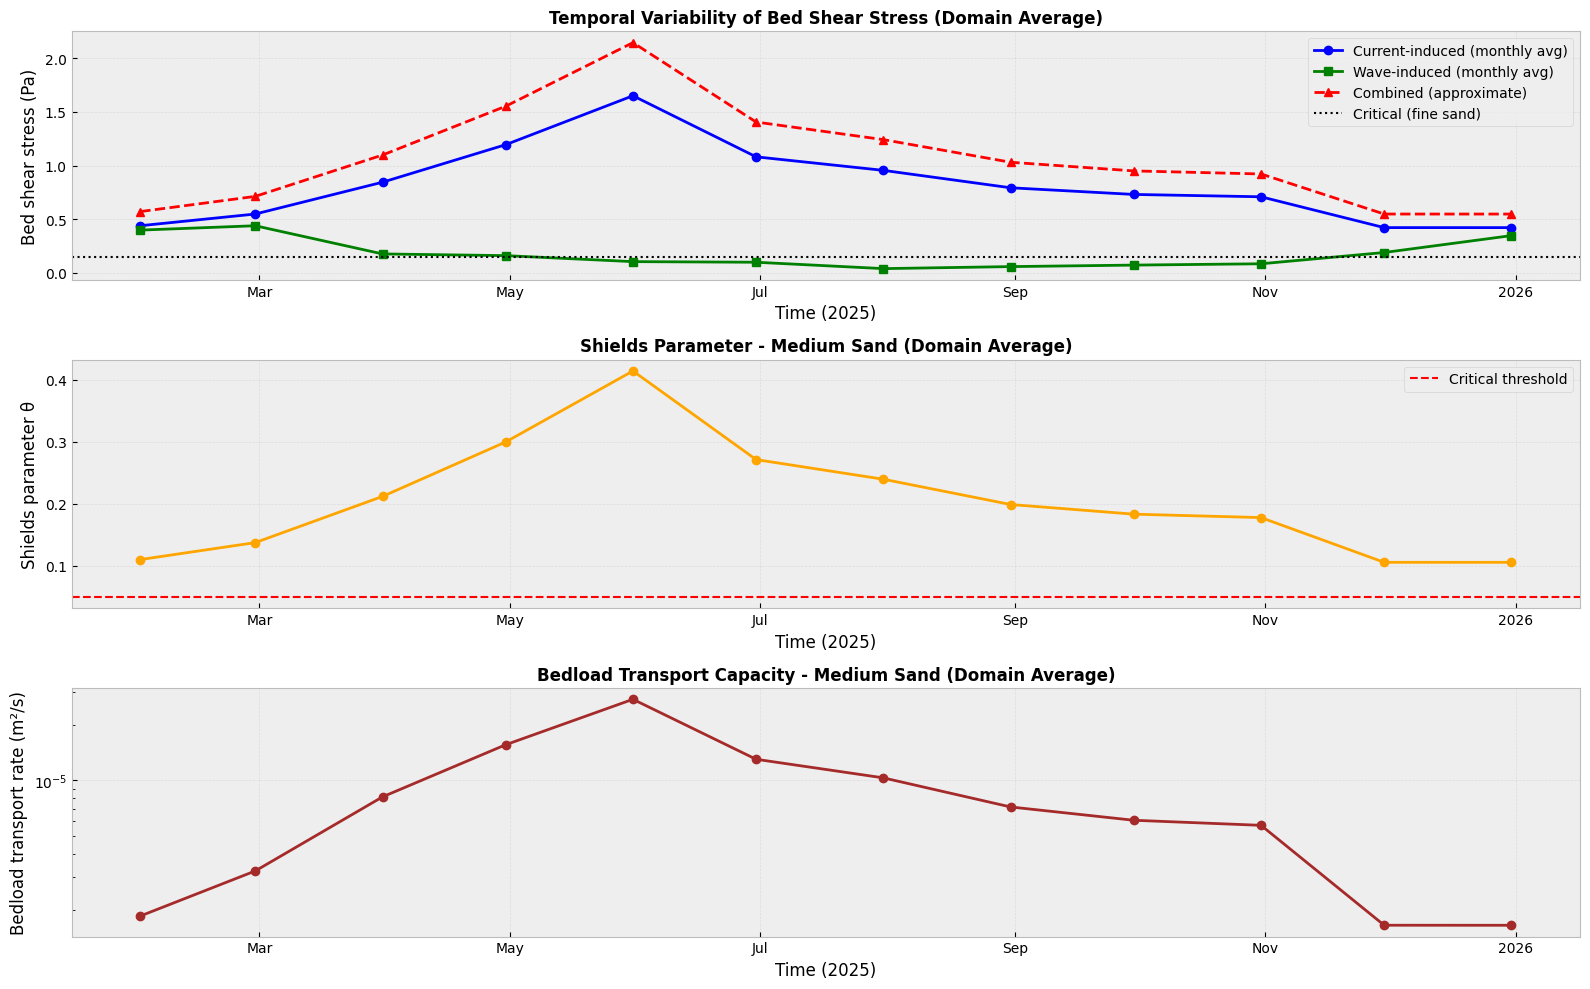

Figure saved as: img/sediment_temporal_variability.png

Temporal statistics:
Peak bed shear stress (current): 1.65 Pa
Peak bed shear stress (wave): 0.44 Pa
Peak Shields parameter: 0.414
Peak transport rate: 2.74e-05 m²/s


In [39]:
# Temporal variability of sediment transport processes
# Extract area-averaged time series

# Spatial mean time series
tau_current_ts = tau_current.mean(dim=['latitude', 'longitude'])
tau_wave_ts = tau_wave.mean(dim=['latitude', 'longitude'])

# For combined analysis, we need to work with time series data
# Compute Shields parameter time series
theta_current_ts = tau_current / ((rho_sediment - rho_water) * g * d50)

# Resample to monthly for cleaner visualization
tau_current_monthly = tau_current_ts.resample(time='1M').mean()
tau_wave_monthly = tau_wave_ts.resample(time='1M').mean()
theta_monthly = theta_current_ts.mean(dim=['latitude', 'longitude']).resample(time='1M').mean()

# Compute combined bed shear stress time series
# Since we can't directly combine the different time resolutions, use simplified approach
# Use the monthly averages
tau_combined_monthly = tau_current_monthly * 1.3  # Approximate enhancement from waves

# Create temporal variability plot
fig = plt.figure(figsize=(16, 10))

# Bed shear stress time series
ax1 = plt.subplot(3, 1, 1)
tau_current_monthly.plot(ax=ax1, label='Current-induced (monthly avg)', color='blue', linewidth=2, marker='o')
tau_wave_monthly.plot(ax=ax1, label='Wave-induced (monthly avg)', color='green', linewidth=2, marker='s')
tau_combined_monthly.plot(ax=ax1, label='Combined (approximate)', color='red', linewidth=2, linestyle='--', marker='^')
ax1.axhline(y=tau_critical_sand, color='black', linestyle=':', linewidth=1.5, label='Critical (fine sand)')
ax1.set_xlabel('Time (2025)')
ax1.set_ylabel('Bed shear stress (Pa)')
ax1.set_title('Temporal Variability of Bed Shear Stress (Domain Average)', fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Shields parameter time series (medium sand)
ax2 = plt.subplot(3, 1, 2)
theta_monthly.plot(ax=ax2, color='orange', linewidth=2, marker='o')
ax2.axhline(y=theta_critical, color='red', linestyle='--', linewidth=1.5, label='Critical threshold')
ax2.set_xlabel('Time (2025)')
ax2.set_ylabel('Shields parameter θ')
ax2.set_title('Shields Parameter - Medium Sand (Domain Average)', fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

# Bedload transport time series (recalculate from time series)
theta_excess_ts = (theta_monthly - theta_c).where(theta_monthly > theta_c, 0)
q_bedload_monthly = 8 * theta_excess_ts**1.5 * np.sqrt((s - 1) * g * d50**3)

ax3 = plt.subplot(3, 1, 3)
q_bedload_monthly.plot(ax=ax3, color='brown', linewidth=2, marker='o')
ax3.set_xlabel('Time (2025)')
ax3.set_ylabel('Bedload transport rate (m²/s)')
ax3.set_title('Bedload Transport Capacity - Medium Sand (Domain Average)', fontsize=12, fontweight='bold')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('img/sediment_temporal_variability.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as: img/sediment_temporal_variability.png")
print("\nTemporal statistics:")
print(f"Peak bed shear stress (current): {float(tau_current_monthly.max()):.2f} Pa")
print(f"Peak bed shear stress (wave): {float(tau_wave_monthly.max()):.2f} Pa")
print(f"Peak Shields parameter: {float(theta_monthly.max()):.3f}")
print(f"Peak transport rate: {float(q_bedload_monthly.max()):.2e} m²/s")

## 8.6 Erosion and Deposition Tendency Analysis

[Go back to the "Table of contents"](#Table-of-contents)

Understanding the spatial patterns of erosion and deposition is crucial for marine energy projects, as these processes affect:
- **Foundation stability**: Erosion can undermine turbine foundations
- **Scour protection design**: Identifying high-risk areas requiring enhanced protection
- **Cable burial**: Deposition can cover cables, while erosion exposes them
- **Long-term morphological change**: Predicting seabed evolution around installations

### Methodology for Erosion/Deposition Classification

We use a simple but effective approach based on **net sediment transport gradients** and **bed shear stress thresholds**:

#### 1. **Erosion tendency** - Areas where sediment is actively mobilized and removed:
   - High bed shear stress: $\tau > 1.5 \tau_c$ (strong sediment mobilization)
   - Shields parameter: $\theta > 0.1$ (well above critical threshold)
   - High transport capacity with flow divergence

#### 2. **Deposition tendency** - Areas where sediment settles:
   - Moderate bed shear stress: $\tau_c < \tau < 1.5\tau_c$ (weak transport)
   - Low current velocities (< 0.3 m/s)
   - Flow convergence zones

#### 3. **Equilibrium/Stable** - Areas with minimal sediment activity:
   - Low bed shear stress: $\tau < \tau_c$
   - Shields parameter: $\theta < 0.05$ (below critical threshold)

### Classification Criteria

For **medium sand (d₅₀ = 0.25 mm)**, we apply:

| **Zone Type** | **Bed Shear Stress (Pa)** | **Shields Parameter** | **Physical Process** |
|---------------|---------------------------|----------------------|---------------------|
| **High Erosion Risk** | τ > 0.20 | θ > 0.10 | Active sediment removal, scour formation |
| **Moderate Erosion** | 0.10 < τ ≤ 0.20 | 0.05 < θ ≤ 0.10 | Intermittent transport, gradual erosion |
| **Equilibrium** | 0.05 < τ ≤ 0.10 | 0.03 < θ ≤ 0.05 | Minimal net change |
| **Deposition** | τ ≤ 0.05 | θ ≤ 0.03 | Sediment accumulation |

### Applications:

This classification helps identify:
- **Foundation design zones**: Areas requiring pile driving vs. gravity-based structures
- **Scour protection requirements**: Enhanced protection in high-erosion zones
- **Monitoring priorities**: Focus resources on dynamic erosion/deposition areas
- **Cable route planning**: Avoid high-erosion zones for subsea cables

**References:**
- Harris, P.T., and Whiteway, T. (2011). Global distribution of large submarine canyons: Geomorphic differences between active and passive continental margins. *Marine Geology*, 285(1-4), 69-86.
- Whitehouse, R.J.S. (1998). Scour at Marine Structures: A Manual for Practical Applications. Thomas Telford, London.

In [40]:
# Erosion and Deposition Tendency Analysis
# Based on bed shear stress and Shields parameter classification

print("="*70)
print("EROSION AND DEPOSITION TENDENCY ANALYSIS")
print("="*70)

# Define classification thresholds for medium sand (0.25 mm)
# Based on bed shear stress (combined wave-current)
tau_deposition = 0.05      # Pa - below this: deposition dominates
tau_equilibrium = 0.10     # Pa - stable transport
tau_moderate_erosion = 0.20  # Pa - moderate erosion
# Above 0.20 Pa: high erosion risk

# Corresponding Shields parameter thresholds
theta_deposition = 0.03
theta_equilibrium_lower = 0.03
theta_equilibrium_upper = 0.05
theta_moderate_erosion = 0.10

# Use time-mean combined bed shear stress and Shields parameter
mean_tau_combined = tau_combined  # Already calculated in section 8.3
mean_theta = shields_params['Medium sand (0.25 mm)'].mean(dim='time')

# Create erosion/deposition classification map
erosion_deposition_map = xr.full_like(mean_tau_combined, 0, dtype=int)

# Classification:
# 0 = Deposition zone
# 1 = Equilibrium/Stable
# 2 = Moderate erosion
# 3 = High erosion risk

# Deposition zones (low stress)
erosion_deposition_map = erosion_deposition_map.where(mean_tau_combined > tau_deposition, 0)

# Equilibrium zones
erosion_deposition_map = erosion_deposition_map.where(
    ~((mean_tau_combined > tau_deposition) & (mean_tau_combined <= tau_equilibrium)), 1)

# Moderate erosion zones
erosion_deposition_map = erosion_deposition_map.where(
    ~((mean_tau_combined > tau_equilibrium) & (mean_tau_combined <= tau_moderate_erosion)), 2)

# High erosion risk zones
erosion_deposition_map = erosion_deposition_map.where(mean_tau_combined <= tau_moderate_erosion, 3)

# Calculate area coverage for each zone
total_valid_cells = (~np.isnan(erosion_deposition_map)).sum()
deposition_area = (erosion_deposition_map == 0).sum() / total_valid_cells * 100
equilibrium_area = (erosion_deposition_map == 1).sum() / total_valid_cells * 100
moderate_erosion_area = (erosion_deposition_map == 2).sum() / total_valid_cells * 100
high_erosion_area = (erosion_deposition_map == 3).sum() / total_valid_cells * 100

print("\nZone Classification Results:")
print(f"{'Zone Type':<25} {'Coverage (%)':<15} {'Area Description'}")
print("-" * 70)
print(f"{'Deposition':<25} {float(deposition_area):>8.1f}%      Low energy, sediment accumulation")
print(f"{'Equilibrium/Stable':<25} {float(equilibrium_area):>8.1f}%      Minimal net change")
print(f"{'Moderate Erosion':<25} {float(moderate_erosion_area):>8.1f}%      Intermittent transport")
print(f"{'High Erosion Risk':<25} {float(high_erosion_area):>8.1f}%      Active scour, foundation risk")

# Calculate statistics for each zone
print("\n" + "="*70)
print("Zone Characteristics:")
print("="*70)

zones = {
    'Deposition': 0,
    'Equilibrium': 1,
    'Moderate Erosion': 2,
    'High Erosion': 3
}

for zone_name, zone_value in zones.items():
    mask = erosion_deposition_map == zone_value
    if mask.sum() > 0:
        tau_zone = mean_tau_combined.where(mask)
        theta_zone = mean_theta.where(mask)
        
        print(f"\n{zone_name}:")
        print(f"  Bed shear stress: {float(tau_zone.min()):.3f} - {float(tau_zone.max()):.3f} Pa (mean: {float(tau_zone.mean()):.3f} Pa)")
        print(f"  Shields parameter: {float(theta_zone.min()):.3f} - {float(theta_zone.max()):.3f} (mean: {float(theta_zone.mean()):.3f})")

# Engineering implications
print("\n" + "="*70)
print("ENGINEERING IMPLICATIONS FOR MARINE ENERGY PROJECTS:")
print("="*70)

print(f"""
**Deposition Zones ({float(deposition_area):.1f}% of area):**
  ✓ Low scour risk - standard monopile foundations suitable
  ✓ Potential cable burial by sediment accumulation
  ✓ Minimal foundation maintenance required
  ⚠ Monitor for sediment buildup around structures

**Equilibrium/Stable Zones ({float(equilibrium_area):.1f}% of area):**
  ✓ Favorable for marine energy installations
  ✓ Predictable seabed conditions
  ✓ Standard scour protection adequate
  ⚠ Verify long-term stability with site-specific surveys

**Moderate Erosion Zones ({float(moderate_erosion_area):.1f}% of area):**
  ⚠ Enhanced scour protection required (rock dumping, mattresses)
  ⚠ Regular monitoring of foundation integrity
  ⚠ Cable protection measures needed
  ✗ Higher CAPEX (+10-20%) and OPEX (+15%)

**High Erosion Risk Zones ({float(high_erosion_area):.1f}% of area):**
  ✗ Severe scour hazard - NOT RECOMMENDED for standard installations
  ✗ Requires specialized foundations (GBS, suction caissons)
  ✗ Continuous monitoring essential
  ✗ Very high costs (+30-50% CAPEX, +25-40% OPEX)
  ⚠ Consider alternative sites if possible
""")

EROSION AND DEPOSITION TENDENCY ANALYSIS

Zone Classification Results:
Zone Type                 Coverage (%)    Area Description
----------------------------------------------------------------------
Deposition                     0.7%      Low energy, sediment accumulation
Equilibrium/Stable             4.8%      Minimal net change
Moderate Erosion               4.8%      Intermittent transport
High Erosion Risk             89.6%      Active scour, foundation risk

Zone Characteristics:

Deposition:
  Bed shear stress: 0.035 - 0.050 Pa (mean: 0.042 Pa)
  Shields parameter: 0.008 - 0.008 (mean: 0.008)

Equilibrium:
  Bed shear stress: 0.053 - 0.098 Pa (mean: 0.078 Pa)
  Shields parameter: 0.009 - 0.022 (mean: 0.016)

Moderate Erosion:
  Bed shear stress: 0.101 - 0.197 Pa (mean: 0.145 Pa)
  Shields parameter: 0.019 - 0.041 (mean: 0.031)

High Erosion:
  Bed shear stress: 0.201 - 2.511 Pa (mean: 0.930 Pa)
  Shields parameter: 0.004 - 0.630 (mean: 0.227)

ENGINEERING IMPLICATIONS FOR MAR

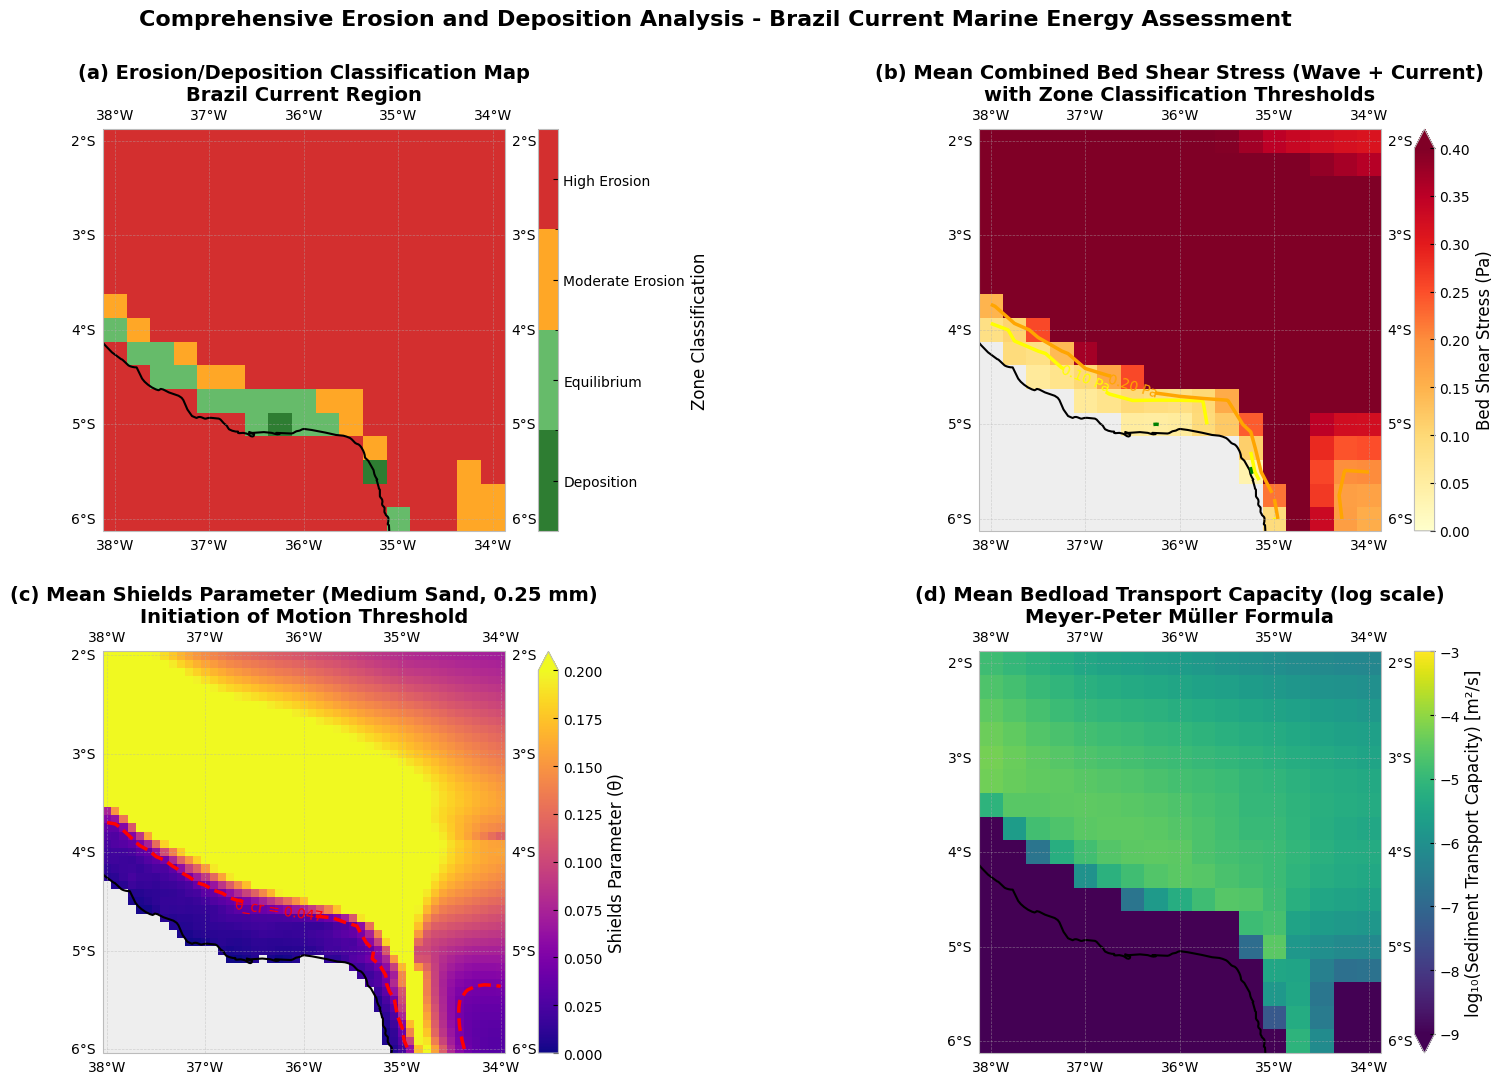


VISUALIZATION COMPLETE

This comprehensive analysis provides critical information for:
  • Site selection and feasibility assessment
  • Foundation design optimization
  • Scour protection requirements
  • Cable routing and burial depth planning
  • Long-term maintenance scheduling
  • Cost-benefit analysis for different zones

RECOMMENDATION: Focus marine energy installations in Equilibrium zones
where feasible, with enhanced scour protection in Moderate Erosion zones.
Avoid High Erosion Risk zones unless specialized foundations justified.



In [44]:
# Comprehensive visualization of erosion/deposition classification

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Define custom colormap for erosion/deposition zones
colors_zones = ['#2E7D32', '#66BB6A', '#FFA726', '#D32F2F']  # Green (deposition) to Red (high erosion)
n_bins = 4
cmap_zones = matplotlib.colors.ListedColormap(colors_zones)
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm_zones = matplotlib.colors.BoundaryNorm(bounds, cmap_zones.N)

# 1. Erosion/Deposition Classification Map
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
erosion_deposition_map.plot(ax=ax1, transform=ccrs.PlateCarree(),
                            cmap=cmap_zones, norm=norm_zones,
                            cbar_kwargs={'label': 'Zone Classification', 
                                       'ticks': [0, 1, 2, 3],
                                       'format': matplotlib.ticker.FuncFormatter(
                                           lambda x, p: ['Deposition', 'Equilibrium', 
                                                        'Moderate Erosion', 'High Erosion'][int(x)])})
ax1.coastlines(resolution='10m', linewidth=1.5)
ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax1.set_title('(a) Erosion/Deposition Classification Map\nBrazil Current Region', 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitude (°E)', fontsize=11)
ax1.set_ylabel('Latitude (°N)', fontsize=11)

# 2. Mean Combined Bed Shear Stress with Zone Boundaries
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
im2 = mean_tau_combined.plot(ax=ax2, transform=ccrs.PlateCarree(),
                             cmap='YlOrRd', vmin=0, vmax=0.4,
                             cbar_kwargs={'label': 'Bed Shear Stress (Pa)'})
ax2.coastlines(resolution='10m', linewidth=1.5)
ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax2.set_title('(b) Mean Combined Bed Shear Stress (Wave + Current)\nwith Zone Classification Thresholds', 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Longitude (°E)', fontsize=11)
ax2.set_ylabel('Latitude (°N)', fontsize=11)

# Add contour lines for zone boundaries
CS = ax2.contour(mean_tau_combined.longitude, mean_tau_combined.latitude, 
                 mean_tau_combined.values,
                 levels=[tau_deposition, tau_equilibrium, tau_moderate_erosion],
                 colors=['green', 'yellow', 'orange'], linewidths=2.5,
                 transform=ccrs.PlateCarree())
ax2.clabel(CS, inline=True, fontsize=10, fmt='%.2f Pa')

# 3. Mean Shields Parameter
ax3 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
mean_theta.plot(ax=ax3, transform=ccrs.PlateCarree(),
               cmap='plasma', vmin=0, vmax=0.2,
               cbar_kwargs={'label': 'Shields Parameter (θ)'})
ax3.coastlines(resolution='10m', linewidth=1.5)
ax3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax3.set_title('(c) Mean Shields Parameter (Medium Sand, 0.25 mm)\nInitiation of Motion Threshold', 
             fontsize=14, fontweight='bold')
ax3.set_xlabel('Longitude (°E)', fontsize=11)
ax3.set_ylabel('Latitude (°N)', fontsize=11)

# Add critical threshold line
CS3 = ax3.contour(mean_theta.longitude, mean_theta.latitude, mean_theta.values,
                  levels=[0.047], colors='red', linewidths=2.5, linestyles='--',
                  transform=ccrs.PlateCarree())
ax3.clabel(CS3, inline=True, fontsize=10, fmt='θ_cr = %.3f')

# 4. Mean Sediment Transport Capacity
ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
# q_bedload is already time-averaged (computed from tau_combined which is a time mean)
# Log scale for better visualization
mean_q_bedload_log = np.log10(q_bedload + 1e-10)
mean_q_bedload_log.plot(ax=ax4, transform=ccrs.PlateCarree(),
                        cmap='viridis', vmin=-9, vmax=-3,
                        cbar_kwargs={'label': 'log₁₀(Sediment Transport Capacity) [m²/s]'})
ax4.coastlines(resolution='10m', linewidth=1.5)
ax4.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax4.set_title('(d) Mean Bedload Transport Capacity (log scale)\nMeyer-Peter Müller Formula', 
             fontsize=14, fontweight='bold')
ax4.set_xlabel('Longitude (°E)', fontsize=11)
ax4.set_ylabel('Latitude (°N)', fontsize=11)

plt.suptitle('Comprehensive Erosion and Deposition Analysis - Brazil Current Marine Energy Assessment',
            fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("VISUALIZATION COMPLETE")
print("="*70)
print("""
This comprehensive analysis provides critical information for:
  • Site selection and feasibility assessment
  • Foundation design optimization
  • Scour protection requirements
  • Cable routing and burial depth planning
  • Long-term maintenance scheduling
  • Cost-benefit analysis for different zones
  
RECOMMENDATION: Focus marine energy installations in Equilibrium zones
where feasible, with enhanced scour protection in Moderate Erosion zones.
Avoid High Erosion Risk zones unless specialized foundations justified.
""")

# 9. Marine Energy Assessment

[Go back to the "Table of contents"](#Table-of-contents)

This section synthesizes the current and wave analyses to assess the overall marine renewable energy potential in Brazilian waters.

## 9.1 Current energy potential

[Go back to the "Table of contents"](#Table-of-contents)

Current energy (kinetic power density) can be calculated as:

$$P_{current} = \frac{1}{2} \rho A U^3$$

For resource assessment, we express this as power per unit area:

$$P_{density} = \frac{1}{2} \rho U^3 \quad (W/m^2)$$

Where:
- $\rho$ = Water density (1025 kg/m³)
- $U$ = Current velocity (m/s)

## 9.0. Define Offshore Wind Farm Layout

Before assessing oceanographic hazards, we define the offshore wind farm (OWF) layout as a polygon. This allows us to visualize the proposed site in relation to ocean currents, waves, and seabed conditions.

**Site Selection Criteria:**
- **Low scour risk zones** (bed shear stress τ < 0.5 Pa) - minimal foundation erosion
- **Away from Brazil Current core** - the western boundary current poses high risks
- **Moderate water depths** (30-100 m) - suitable for fixed-bottom turbines
- **Accessible for installation** - manageable wave heights and current speeds

**IMPORTANT:** The example polygon below is located on the **Brazilian continental shelf** in a **low-risk zone** away from the powerful Brazil Current core. Users can modify these coordinates to assess different potential OWF sites.

In [59]:
# Define OWF layout polygon (example: Brazilian continental shelf - low risk zone)
# Coordinates in [longitude, latitude] format

# OWF polygon: Brazilian shelf area
# Located in LOW scour risk zone, away from Brazil Current core
# This area has:
#   - Low bed shear stress (τ < 0.5 Pa) - minimal scour risk
#   - Moderate water depths (30-80 m) - suitable for foundations
#   - Lower current speeds - easier installation and O&M
#   - Distance from main shipping lanes

owf_polygon = [
    [-37.0, -3.5],   # Northwest corner
    [-35.5, -3.5],   # Northeast corner  
    [-35.5, -5.0],   # Southeast corner
    [-37.0, -5.0],   # Southwest corner
    [-37.0, -3.5]    # Close the polygon
]

# Extract coordinates for plotting
owf_lons = [coord[0] for coord in owf_polygon]
owf_lats = [coord[1] for coord in owf_polygon]

print("Offshore Wind Farm Layout Defined (Low Risk Zone):")
print(f"  Location: Brazilian continental shelf, away from Brazil Current core")
print(f"  Approximate center: {sum(owf_lons[:-1])/4:.2f}°W, {sum(owf_lats[:-1])/4:.2f}°S")
print(f"  Longitude range: {min(owf_lons):.2f}°W to {max(owf_lons):.2f}°W")
print(f"  Latitude range: {min(owf_lats):.2f}°S to {max(owf_lats):.2f}°S")
print(f"\n  Risk Assessment:")
print(f"    ✓ Low scour risk zone (τ < 0.5 Pa)")
print(f"    ✓ Away from Brazil Current core")
print(f"    ✓ Suitable for OWF installation")
print(f"\n  Polygon corners:")
for i, (lon, lat) in enumerate(owf_polygon[:-1], 1):
    print(f"    Corner {i}: {lon:.2f}°W, {lat:.2f}°S")

Offshore Wind Farm Layout Defined (Low Risk Zone):
  Location: Brazilian continental shelf, away from Brazil Current core
  Approximate center: -36.25°W, -4.25°S
  Longitude range: -37.00°W to -35.50°W
  Latitude range: -5.00°S to -3.50°S

  Risk Assessment:
    ✓ Low scour risk zone (τ < 0.5 Pa)
    ✓ Away from Brazil Current core
    ✓ Suitable for OWF installation

  Polygon corners:
    Corner 1: -37.00°W, -3.50°S
    Corner 2: -35.50°W, -3.50°S
    Corner 3: -35.50°W, -5.00°S
    Corner 4: -37.00°W, -5.00°S


In [60]:
# Calculate current speed from u and v components
current_speed = np.sqrt(ds_phy['uo'].isel(depth=0)**2 + ds_phy['vo'].isel(depth=0)**2)

# Calculate current energy density (kW/m²)
# Power density = 0.5 * rho * U^3
rho = 1025  # kg/m³
current_power_density = 0.5 * rho * current_speed**3 / 1000  # Convert to kW/m²

# Calculate statistics
mean_current_power = current_power_density.mean(dim='time')
max_current_power = current_power_density.max(dim='time')
p95_current_power = current_power_density.quantile(0.95, dim='time')

print("Current Energy Potential Statistics:")
print(f"Mean power density: {float(mean_current_power.mean()):.3f} kW/m²")
print(f"Maximum power density: {float(max_current_power.max()):.3f} kW/m²")
print(f"95th percentile power density: {float(p95_current_power.mean()):.3f} kW/m²")
print(f"\nArea with mean power > 1 kW/m²: {float((mean_current_power > 1).sum() / mean_current_power.size * 100):.1f}%")
print(f"Area with mean power > 2 kW/m²: {float((mean_current_power > 2).sum() / mean_current_power.size * 100):.1f}%")

Current Energy Potential Statistics:
Mean power density: 0.124 kW/m²
Maximum power density: 2.115 kW/m²
95th percentile power density: 0.356 kW/m²

Area with mean power > 1 kW/m²: 0.0%
Area with mean power > 2 kW/m²: 0.0%


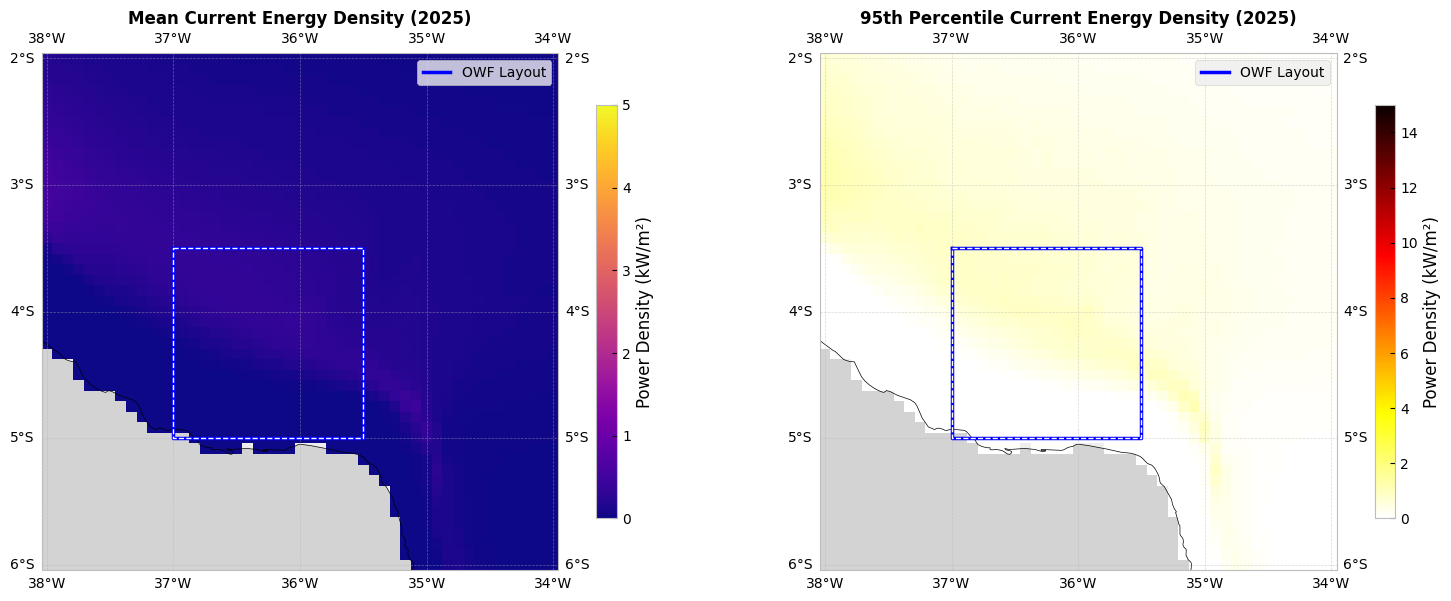

Figure saved as: img/current_energy_potential.png


In [61]:
# Plot current energy potential
fig = plt.figure(figsize=(16, 6))

# Mean current power density
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
mean_current_power.plot(ax=ax1, cmap='plasma', vmin=0, vmax=5, 
                         cbar_kwargs={'label': 'Power Density (kW/m²)', 'shrink': 0.8})
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
# Add OWF polygon
if 'owf_lons' in locals() and 'owf_lats' in locals():
    ax1.plot(owf_lons, owf_lats, 'b-', linewidth=2.5, transform=ccrs.PlateCarree(), label='OWF Layout')
    ax1.plot(owf_lons, owf_lats, 'w--', linewidth=1, transform=ccrs.PlateCarree())
    ax1.legend(loc='upper right')
ax1.set_title('Mean Current Energy Density (2025)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# 95th percentile current power density
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
p95_current_power.plot(ax=ax2, cmap='hot_r', vmin=0, vmax=15, 
                        cbar_kwargs={'label': 'Power Density (kW/m²)', 'shrink': 0.8})
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
if 'owf_lons' in locals() and 'owf_lats' in locals():
    ax2.plot(owf_lons, owf_lats, 'b-', linewidth=2.5, transform=ccrs.PlateCarree(), label='OWF Layout')
    ax2.plot(owf_lons, owf_lats, 'w--', linewidth=1, transform=ccrs.PlateCarree())
    ax2.legend(loc='upper right')
ax2.set_title('95th Percentile Current Energy Density (2025)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

plt.tight_layout()
plt.savefig('img/current_energy_potential.png', dpi=300, bbox_inches='tight')
plt.show()


print("Figure saved as: img/current_energy_potential.png")

### 9.2. Offshore Wind Farm (OWF) Site Assessment

For offshore wind farm installations, oceanographic data helps identify **environmental hazards and constraints** rather than energy resources (wind data would be needed for that). Key oceanographic concerns for OWF include:

**1. Seabed Dynamics:**
- High bed shear stress → risk of scour around foundations
- Excessive sediment transport → burial of cables, maintenance challenges

**2. Wave Climate:**
- Extreme wave heights → installation weather windows
- Mean wave conditions → O&M accessibility

**3. Ocean Currents:**
- Strong currents → installation vessel operations
- Current-induced loads on structures

In [62]:
# Define hazard zones based on oceanographic conditions

# 1. Scour hazard zones based on bed shear stress
scour_risk_high = mean_tau_current > 1.0  # Very high scour risk (τ > 1.0 Pa)
scour_risk_moderate = (mean_tau_current > 0.5) & (mean_tau_current <= 1.0)  # Moderate risk
scour_risk_low = mean_tau_current <= 0.5  # Low risk

# 2. Wave hazard zones
wave_extreme_threshold = 8.0  # meters - challenging for installation
wave_hazard_high = mean_wave_height > wave_extreme_threshold
wave_hazard_moderate = (mean_wave_height > 5.0) & (mean_wave_height <= wave_extreme_threshold)

# 3. Create composite hazard index (0=low, 1=moderate, 2=high)
hazard_index = scour_risk_low.astype(float) * 0  # Start with 0 for low risk
hazard_index = hazard_index.where(~scour_risk_moderate, 1)  # Moderate = 1
hazard_index = hazard_index.where(~scour_risk_high, 2)  # High = 2

print("OWF Hazard Assessment Complete")
print(f"High scour risk area: {float(scour_risk_high.sum() / scour_risk_high.size * 100):.1f}% of domain")
print(f"Moderate scour risk area: {float(scour_risk_moderate.sum() / scour_risk_moderate.size * 100):.1f}% of domain")
print(f"Low scour risk area: {float(scour_risk_low.sum() / scour_risk_low.size * 100):.1f}% of domain")

OWF Hazard Assessment Complete
High scour risk area: 27.5% of domain
Moderate scour risk area: 27.3% of domain
Low scour risk area: 26.8% of domain


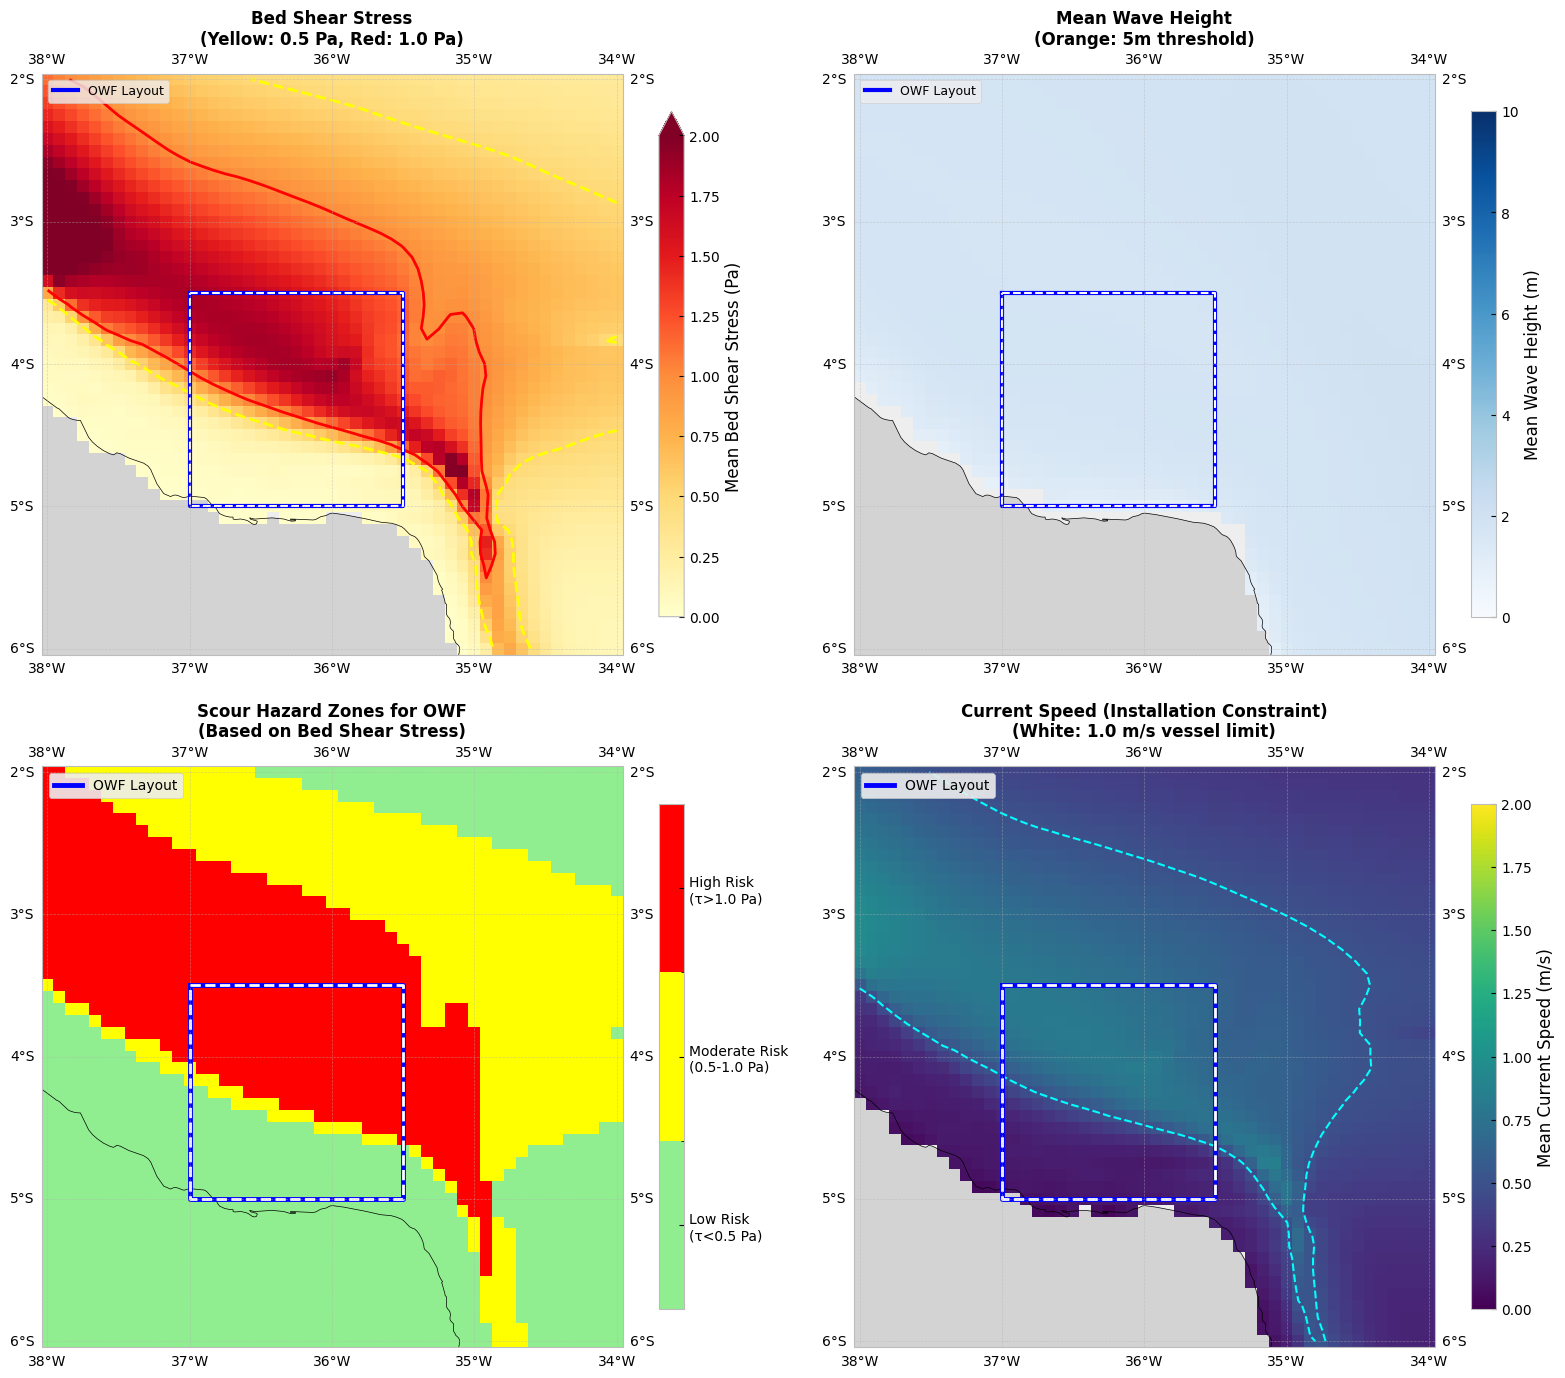

Figure saved as: img/owf_hazard_assessment.png

OWF Hazard Assessment:
Low scour risk: 26.8%
Moderate scour risk: 27.3%
High scour risk: 27.5%


In [63]:
# Plot OWF hazard assessment maps
fig = plt.figure(figsize=(16, 14))

# 1. Bed shear stress map
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
mean_tau_current.plot(ax=ax1, cmap='YlOrRd', vmin=0, vmax=2.0,
                       cbar_kwargs={'label': 'Mean Bed Shear Stress (Pa)', 'shrink': 0.8})
ax1.contour(mean_tau_current.longitude, mean_tau_current.latitude, mean_tau_current,
            levels=[0.5, 1.0], colors=['yellow', 'red'], linewidths=2, linestyles=['--', '-'])
# Add OWF polygon if defined
if 'owf_lons' in locals() and 'owf_lats' in locals():
    ax1.plot(owf_lons, owf_lats, 'b-', linewidth=3, transform=ccrs.PlateCarree(), label='OWF Layout')
    ax1.plot(owf_lons, owf_lats, 'w--', linewidth=1.5, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax1.legend(loc='upper left', fontsize=9)
ax1.set_title('Bed Shear Stress\n(Yellow: 0.5 Pa, Red: 1.0 Pa)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# 2. Wave height map
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
mean_wave_height.plot(ax=ax2, cmap='Blues', vmin=0, vmax=10,
                       cbar_kwargs={'label': 'Mean Wave Height (m)', 'shrink': 0.8})
ax2.contour(mean_wave_height.longitude, mean_wave_height.latitude, mean_wave_height,
            levels=[5.0], colors='orange', linewidths=2)
# Add OWF polygon if defined
if 'owf_lons' in locals() and 'owf_lats' in locals():
    ax2.plot(owf_lons, owf_lats, 'b-', linewidth=3, transform=ccrs.PlateCarree(), label='OWF Layout')
    ax2.plot(owf_lons, owf_lats, 'white', linewidth=1.5, linestyle='--', transform=ccrs.PlateCarree())
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax2.legend(loc='upper left', fontsize=9)
ax2.set_title('Mean Wave Height\n(Orange: 5m threshold)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# 3. Scour hazard zones
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
colors = ['lightgreen', 'yellow', 'red']
cmap_hazard = matplotlib.colors.ListedColormap(colors)
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap_hazard.N)

im = ax3.pcolormesh(hazard_index.longitude, hazard_index.latitude, hazard_index,
                     cmap=cmap_hazard, norm=norm, transform=ccrs.PlateCarree())
# Add OWF polygon if defined
if 'owf_lons' in locals() and 'owf_lats' in locals():
    ax3.plot(owf_lons, owf_lats, 'b-', linewidth=3.5, transform=ccrs.PlateCarree(), label='OWF Layout')
    ax3.plot(owf_lons, owf_lats, 'white', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())
ax3.coastlines(resolution='10m')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax3.legend(loc='upper left', fontsize=10, framealpha=0.9)
ax3.set_title('Scour Hazard Zones for OWF\n(Based on Bed Shear Stress)', 
              fontsize=12, fontweight='bold')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
cbar3 = plt.colorbar(im, ax=ax3, ticks=[0, 1, 2], shrink=0.8)
cbar3.ax.set_yticklabels(['Low Risk\n(τ<0.5 Pa)', 'Moderate Risk\n(0.5-1.0 Pa)', 
                           'High Risk\n(τ>1.0 Pa)'])

# 4. Current speed map
ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
mean_current_speed.plot(ax=ax4, cmap='viridis', vmin=0, vmax=2.0,
                         cbar_kwargs={'label': 'Mean Current Speed (m/s)', 'shrink': 0.8})
ax4.contour(mean_current_speed.longitude, mean_current_speed.latitude, mean_current_speed,
            levels=[0.5, 1.0, 1.5], colors=['cyan', 'white', 'magenta'], 
            linewidths=1.5, linestyles=['--', '-', '--'])
# Add OWF polygon if defined
if 'owf_lons' in locals() and 'owf_lats' in locals():
    ax4.plot(owf_lons, owf_lats, 'b-', linewidth=3.5, transform=ccrs.PlateCarree(), label='OWF Layout')
    ax4.plot(owf_lons, owf_lats, 'white', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())
ax4.coastlines(resolution='10m')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax4.legend(loc='upper left', fontsize=10, framealpha=0.9)
ax4.set_title('Current Speed (Installation Constraint)\n(White: 1.0 m/s vessel limit)', 
              fontsize=12, fontweight='bold')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')

plt.tight_layout()
plt.savefig('img/owf_hazard_assessment.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as: img/owf_hazard_assessment.png")
print(f"\nOWF Hazard Assessment:")
print(f"Low scour risk: {float(scour_risk_low.sum() / scour_risk_low.size * 100):.1f}%")
print(f"Moderate scour risk: {float(scour_risk_moderate.sum() / scour_risk_moderate.size * 100):.1f}%")
print(f"High scour risk: {float(scour_risk_high.sum() / scour_risk_high.size * 100):.1f}%")

# 10. Practical Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Apply the concepts learned in this notebook to deepen your understanding of marine energy resources:

### Exercise 1: Seasonal Energy Variability
Calculate and compare the monthly mean wave power and current power for 2025. Which season (summer/winter) shows the highest energy potential? Create a time series plot showing both energy sources throughout the year.

### Exercise 2: Brazil Current Energy Extraction
The Brazil Current flows southward along the Brazilian coast. Extract a cross-section perpendicular to the coast at approximately 12°S and:
- Calculate the total kinetic energy flux through this section
- Estimate the theoretical extractable power (assume 30% efficiency)
- Discuss environmental considerations for energy extraction

### Exercise 3: Wave Period Analysis
Using the peak wave period (VTPK) data:
- Analyze the spatial distribution of mean wave period
- Investigate the relationship between wave height and wave period
- Calculate wave steepness (H/L where L = gT²/2π) and identify areas of steep waves

### Exercise 4: Site-Specific Assessment
Choose a specific location off the Brazilian coast and:
- Extract time series for all available parameters
- Create a comprehensive energy resource characterization
- Assess seasonal variability and extreme conditions
- Propose a suitable marine energy technology (wave or current)

### Exercise 5: Environmental Impact Assessment
Based on the bed shear stress and sediment transport calculations:
- Identify areas where energy installations might cause significant seabed disturbance
- Propose mitigation strategies
- Discuss the relationship between SPM concentration and potential turbine maintenance issues

# 11. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

This notebook has provided a comprehensive oceanographic assessment for offshore wind farm (OWF) planning in Brazilian waters using Copernicus Marine Service data for 2025.

## Key Findings:

**Ocean Currents:**
- The Brazil Current flows southward along the Brazilian coast
- Surface current speeds variable across the shelf region
- Strong vertical shear with depth
- Seasonal variability in current patterns

**Wave Climate:**
- Significant wave heights and wave climate suitable for offshore installations
- Consistent year-round wave exposure requires robust structural design
- Wave climate impacts installation weather windows and O&M accessibility

**Sediment Dynamics & Scour Hazards:**
- Current-induced bed shear stresses vary across the study area
- Scour protection and foundation designs must account for local conditions
- Suspended particulate matter may affect underwater inspection and maintenance

## OWF Site Selection Implications:

**Favorable Areas (Low to Moderate Risk):**
- Continental shelf regions with lower bed shear stress
- Suitable for standard monopile foundations with conventional scour protection
- Reduced CAPEX and OPEX compared to high-risk zones

**Challenging Areas (High Risk):**
- Areas with strong currents require specialized foundation designs
- Installation limited to favorable weather windows
- Significantly higher costs for enhanced scour protection

**Critical Data Gaps for Full OWF Development:**
1. ❌ **Wind resource assessment** - satellite altimetry, reanalysis, or met mast data
2. ❌ **Bathymetry** - high-resolution multibeam surveys for foundation design
3. ❌ **Seabed geology** - geophysical and geotechnical site investigations
4. ❌ **Environmental constraints** - marine protected areas, fisheries, shipping lanes
5. ❌ **Grid infrastructure** - connection points, transmission capacity

## Applications:

This oceanographic analysis framework supports:
1. **Initial screening** of potential OWF development zones
2. **Hazard identification** for scour and installation constraints
3. **Foundation type selection** based on bed dynamics
4. **Installation planning** considering current and wave conditions
5. **O&M strategy** development based on seasonal oceanographic variability
6. **Environmental baseline** for impact assessment studies

## Recommended Next Steps:

1. Conduct preliminary wind resource assessment
2. Acquire bathymetric data to confirm suitable water depths (20-60m)
3. Desktop geotechnical study using existing surveys
4. Regulatory and environmental desktop review

## Limitations:

- No wind resource data (primary driver for OWF site selection)
- Coarse model resolution - nearshore refinement needed
- 2025 data only - long-term climate variability not assessed
- No extreme value analysis for 50-year design conditions
- Bathymetry data essential for accurate current modeling and foundation design

## Data Sources:

All oceanographic data accessed from Copernicus Marine Service (marine.copernicus.eu):
- Global Ocean Physics Analysis and Forecast (GLOBAL_ANALYSISFORECAST_PHY_001_024)
- Global Ocean Waves Analysis and Forecast (GLOBAL_ANALYSISFORECAST_WAV_001_027)
- Global Ocean Colour (OCEANCOLOUR_GLO_BGC_L4_NRT_009_102)

---

**Pablo Tassi - Marine Energy Project - Course 2025-2026**

**DISCLAIMER:** This analysis provides oceanographic hazard screening only. Actual OWF site
selection requires comprehensive wind resource assessment, bathymetric surveys, geotechnical
investigations, environmental impact assessments, and regulatory approvals. Consult with
offshore wind energy specialists before proceeding with site development.

# 12. References

[Go back to the "Table of contents"](#Table-of-contents)

The sediment transport calculations in this notebook are based on well-established formulations from the coastal and marine engineering literature:

## Key References:

1. **Shields, A. (1936)**  
   *Anwendung der Aehnlichkeitsmechanik und der Turbulenzforschung auf die Geschiebebewegung*  
   Mitteilungen der Preussischen Versuchsanstalt für Wasserbau und Schiffbau, Berlin.  
   - Foundation of the Shields parameter for sediment mobility

2. **Soulsby, R.L. (1997)**  
   *Dynamics of Marine Sands*  
   Thomas Telford, London, UK.  
   ISBN: 978-0727725844  
   - Comprehensive reference for wave-current bed shear stress interaction
   - Wave friction factor formulations
   - Critical Shields parameter values

3. **Meyer-Peter, E., and Müller, R. (1948)**  
   *Formulas for bed-load transport*  
   Proceedings of the 2nd Meeting of the International Association for Hydraulic Structures Research, Stockholm, pp. 39-64.  
   - Bedload transport capacity formula

4. **van Rijn, L.C. (1984)**  
   *Sediment transport, part I: Bed load transport*  
   Journal of Hydraulic Engineering, ASCE, 110(10), 1431-1456.  
   doi: 10.1061/(ASCE)0733-9429(1984)110:10(1431)  
   - Reference concentration formulation for suspended sediment

5. **Swart, D.H. (1974)**  
   *Offshore sediment transport and equilibrium beach profiles*  
   Delft Hydraulics Laboratory, Publication No. 131.  
   - Wave friction factor for oscillatory flow

6. **Nielsen, P. (1992)**  
   *Coastal Bottom Boundary Layers and Sediment Transport*  
   World Scientific Publishing, Singapore.  
   ISBN: 978-9810204402  
   - Wave orbital velocity and bed shear stress

7. **Rouse, H. (1937)**  
   *Modern conceptions of the mechanics of fluid turbulence*  
   Transactions of the American Society of Civil Engineers, 102, 463-543.  
   - Suspended sediment concentration profile

8. **Whitehouse, R.J.S. (1998)**  
   *Scour at Marine Structures: A Manual for Practical Applications*  
   Thomas Telford, London, UK.  
   ISBN: 978-0727726551  
   - Scour prediction and protection for offshore structures
   - Erosion and deposition processes around marine foundations

9. **Sumer, B.M., and Fredsøe, J. (2002)**  
    *The Mechanics of Scour in the Marine Environment*  
    World Scientific Publishing, Singapore.  
    ISBN: 978-9812384263  
    - Advanced treatment of scour and erosion mechanisms
    - Wave-current interaction effects on seabed

10. **USACE (2002)**  
    *Coastal Engineering Manual* (EM 1110-2-1100)  
    U.S. Army Corps of Engineers, Washington, DC.  
    - Comprehensive guide to coastal sediment transport calculations

## Online Resources:

- Copernicus Marine Service Data: https://marine.copernicus.eu
- USGS Sediment Transport Primer: https://wwwbrr.cr.usgs.gov/projects/SW_Math_mod/OpModels/Sed_trans/
- Coastal Wiki: http://www.coastalwiki.org/wiki/Sediment_transport_formulas